<a href="https://colab.research.google.com/github/azzindani/02_Machine_Learning/blob/main/Pakistan_House_Prices_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Version 20240815

## 00 Importing Modules & Mounting Drive

In [1]:
!pip install ydata-profiling

import pathlib
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import numpy as np
import pandas as pd
import sklearn
import pickle
import plotly.express as px
import plotly.graph_objects as go
import xgboost as xgb

from scipy import stats as sm
from IPython.display import Image
from graphviz import Source
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, accuracy_score, average_precision_score, f1_score, precision_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile
from ydata_profiling import ProfileReport
from tabulate import tabulate
from time import sleep

%matplotlib inline

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 24.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=cee0d1b67b9a2a0dbd377403d15dc647c7d02278fdc600b20774f2352d057d0d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [2]:
'''from google.colab import drive
drive.mount('/content/drive') #'''

"from google.colab import drive\ndrive.mount('/content/drive') #"

In [3]:
'''MAIN_PATH = str(pathlib.Path().resolve())
WORK_PATH = MAIN_PATH + '/drive/MyDrive/Workspace'
SOURCE_PATH = WORK_PATH + '/00_Data_Source'
CACHE_PATH = WORK_PATH + '/00_Cache_Data' #'''

"MAIN_PATH = str(pathlib.Path().resolve())\nWORK_PATH = MAIN_PATH + '/drive/MyDrive/Workspace'\nSOURCE_PATH = WORK_PATH + '/00_Data_Source'\nCACHE_PATH = WORK_PATH + '/00_Cache_Data' #"

## 01 Choosing & Importing Dataset

### 01.00 Importing Data from Zipfile

In [4]:
'''filename = 'Diseases_And_Symptoms.zip' # replace this

url = 'https://github.com/azzindani/00_Data_Source/raw/main/'+ filename
http_response = urlopen(url)
zipfile = ZipFile(BytesIO(http_response.read()))
zipfile.extractall() #'''

"filename = 'Diseases_And_Symptoms.zip' # replace this\n\nurl = 'https://github.com/azzindani/00_Data_Source/raw/main/'+ filename\nhttp_response = urlopen(url)\nzipfile = ZipFile(BytesIO(http_response.read()))\nzipfile.extractall() #"

In [5]:
os.listdir()

['.config', 'sample_data']

In [6]:
'''df = pd.read_csv(os.listdir()[1], encoding = 'ISO-8859-1')#, sep = ';')
df.shape #'''

"df = pd.read_csv(os.listdir()[1], encoding = 'ISO-8859-1')#, sep = ';')\ndf.shape #"

### 01.01 Importing Main Data

In [7]:
filename = 'Pakistan_House_Prices_2023.csv' # replace this

url = 'https://github.com/azzindani/00_Data_Source/raw/main/'+ filename
df = pd.read_csv(url, encoding = 'ISO-8859-1')#, sep = ';')
df.shape #'''

(99499, 9)

In [8]:
df.nunique()

Unnamed: 0       99499
property_type        7
price             1421
location          1389
city                 5
baths                7
purpose              2
bedrooms             7
Area_in_Marla      240
dtype: int64

In [9]:
df.head(2)

Unnamed: 0 property_type     price location       city  baths   purpose  \
0           0          Flat  10000000     G-10  Islamabad      2  For Sale   
1           1          Flat   6900000     E-11  Islamabad      3  For Sale   

   bedrooms  Area_in_Marla  
0         2            4.0  
1         3            5.6

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99499 entries, 0 to 99498
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     99499 non-null  int64  
 1   property_type  99499 non-null  object 
 2   price          99499 non-null  int64  
 3   location       99499 non-null  object 
 4   city           99499 non-null  object 
 5   baths          99499 non-null  int64  
 6   purpose        99499 non-null  object 
 7   bedrooms       99499 non-null  int64  
 8   Area_in_Marla  99499 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 6.8+ MB


In [11]:
for column in df.columns:
  if df[column].dtypes == 'object':
    print(column)
    print('-' * 100)
    print(df[column].unique())
    print('=' * 100)

property_type
----------------------------------------------------------------------------------------------------
['Flat' 'House' 'Penthouse' 'Lower Portion' 'Upper Portion' 'Room'
 'Farm House']
location
----------------------------------------------------------------------------------------------------
['G-10' 'E-11' 'G-15' ... 'Defence Fort' 'Sihala Valley'
 'Shahra-e-Liaquat']
city
----------------------------------------------------------------------------------------------------
['Islamabad' 'Lahore' 'Faisalabad' 'Rawalpindi' 'Karachi']
purpose
----------------------------------------------------------------------------------------------------
['For Sale' 'For Rent']


### 01.02 Importing Geo Data

In [12]:
'''geo_path = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json' # replace this

gdf = gpd.read_file(geo_path)
gdf.head(2) #'''

"geo_path = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json' # replace this\n\ngdf = gpd.read_file(geo_path)\ngdf.head(2) #"

In [13]:
'''gdf = gdf.rename(columns = {'name' : 'State'})
gdf = gdf[['State', 'geometry']]
gdf.head(2) #'''

"gdf = gdf.rename(columns = {'name' : 'State'})\ngdf = gdf[['State', 'geometry']]\ngdf.head(2) #"

### 01.03 Importing Additional Data (for enrichment)

### 01.04 Dataframe Back Up

In [14]:
df_bu = df.copy()

## 02 Data Structuring

### 02.01 Selecting & Dropping Variables

In [15]:
column_list = [] # fill this

df = df.drop(column_list, axis = 1)
df.head(2) #'''

Unnamed: 0 property_type     price location       city  baths   purpose  \
0           0          Flat  10000000     G-10  Islamabad      2  For Sale   
1           1          Flat   6900000     E-11  Islamabad      3  For Sale   

   bedrooms  Area_in_Marla  
0         2            4.0  
1         3            5.6

### 02.02 Cleaning Text Object

#### 02.02.01 Convert Header to Proper Text

In [16]:
'''for x in df.columns:
  y = x.title()
  df = df.rename(columns = {x : y}) #'''

'for x in df.columns:\n  y = x.title()\n  df = df.rename(columns = {x : y}) #'

#### 02.02.02 Strip Abnormal Spaces

In [17]:
'''for x in df.columns:
  if df[x].dtypes == 'object':
    try:
      df[x] = df[x].str.strip()
    except:
      pass #'''

"for x in df.columns:\n  if df[x].dtypes == 'object':\n    try:\n      df[x] = df[x].str.strip()\n    except:\n      pass #"

#### 02.02.03 Convert Object Content to Proper Text

In [18]:
'''for x in df.columns:
  if df[x].dtypes == 'object':
    for a in df[x].unique():
      b = a.title()
      df[x] = df[x].replace(a, b)
  else:
    pass #'''

"for x in df.columns:\n  if df[x].dtypes == 'object':\n    for a in df[x].unique():\n      b = a.title()\n      df[x] = df[x].replace(a, b)\n  else:\n    pass #"

### 02.03 Coverting Data

#### 02.03.01 Convert to date

In [19]:
df.head(2)

Unnamed: 0 property_type     price location       city  baths   purpose  \
0           0          Flat  10000000     G-10  Islamabad      2  For Sale   
1           1          Flat   6900000     E-11  Islamabad      3  For Sale   

   bedrooms  Area_in_Marla  
0         2            4.0  
1         3            5.6

In [20]:
column_list = ['Activity Period Start Date'] # fill this

for x in column_list:
  try:
    df[x] = pd.to_datetime(df[x])
  except:
    pass #'''

#### 02.03.02 Convert to integer

In [21]:
column_list = [] # fill this

for x in column_list:
  df[x] = df[x].astype('int') #'''

#### 02.03.03 Convert to Object (if necessary)

In [22]:
column_list = [] # fill this

for x in column_list:
  df[x] = df[x].astype('str') #'''

#### 02.03.04 Replace 0 to Nan (if necessary)

In [23]:
#df = df.replace(0, np.nan)

#### 02.03.05 Filling 0 to Nan

In [24]:
'''for column in df.columns:
  if df[column].dtype == 'float64' or df[column].dtype == 'int64':
    df[column] = df[column].fillna(0)
    print(column)
  else:
    pass #'''

"for column in df.columns:\n  if df[column].dtype == 'float64' or df[column].dtype == 'int64':\n    df[column] = df[column].fillna(0)\n    print(column)\n  else:\n    pass #"

#### 02.03.06 Dropping Nan

In [25]:
#df = df.dropna()

## 03 Data Cleaning

### 03.01 Replacing Variable Component

In [26]:
'''value_dict = {} # fill this

column_name = ''

df[column_name] = df[column_name].replace(value_dict) #'''

"value_dict = {} # fill this\n\ncolumn_name = ''\n\ndf[column_name] = df[column_name].replace(value_dict) #"

### 03.02 Add New Variable

#### 03.02.01 Add by Math Calculation

In [27]:
'''new_var = '' # fill this
obj_var1 = '' # fill this
obj_var2 = '' # fill this

df[new_var] = df[obj_var1] * df [obj_var2] #'''

"new_var = '' # fill this\nobj_var1 = '' # fill this\nobj_var2 = '' # fill this\n\ndf[new_var] = df[obj_var1] * df [obj_var2] #"

#### 03.02.02 Add by Replacing "Other"

In [28]:
'''column_name = '' # fill this

df[column_name].value_counts() #'''

"column_name = '' # fill this\n\ndf[column_name].value_counts() #"

In [29]:
'''value_thres = 1300

replace_list = []

df_dict = df[column_name].value_counts().to_dict()
for i in df_dict:
  if df_dict[i] < value_thres:
    replace_list.append(i)

replace_list #'''

'value_thres = 1300\n\nreplace_list = []\n\ndf_dict = df[column_name].value_counts().to_dict()\nfor i in df_dict:\n  if df_dict[i] < value_thres:\n    replace_list.append(i)\n\nreplace_list #'

In [30]:
'''df[column_name] = df[column_name].copy().replace(to_replace = replace_list, value = 'Other') #'''

"df[column_name] = df[column_name].copy().replace(to_replace = replace_list, value = 'Other') #"

### 03.03 Inaccuracies

In [31]:
column_list = [] # fill this

for x in column_list:
  try:
    df[x] = df[x].replace('0', np.nan)
    df = df.dropna()
  except:
    pass

### 03.04 Handling

##### Data Distribution Check (Before)

In [32]:
df.head(2)

Unnamed: 0 property_type     price location       city  baths   purpose  \
0           0          Flat  10000000     G-10  Islamabad      2  For Sale   
1           1          Flat   6900000     E-11  Islamabad      3  For Sale   

   bedrooms  Area_in_Marla  
0         2            4.0  
1         3            5.6

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99499 entries, 0 to 99498
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     99499 non-null  int64  
 1   property_type  99499 non-null  object 
 2   price          99499 non-null  int64  
 3   location       99499 non-null  object 
 4   city           99499 non-null  object 
 5   baths          99499 non-null  int64  
 6   purpose        99499 non-null  object 
 7   bedrooms       99499 non-null  int64  
 8   Area_in_Marla  99499 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 6.8+ MB


In [34]:
'''x = 'current_month_debit' # replace this
y = 'current_month_balance' # replace this
color = 'occupation' # replace this

fig = px.histogram(
  df,
  x = x,
  y = y,
  color = color,
  marginal = 'box',
  hover_data = df.columns
)

fig.show() #'''

"x = 'current_month_debit' # replace this\ny = 'current_month_balance' # replace this\ncolor = 'occupation' # replace this\n\nfig = px.histogram(\n  df,\n  x = x,\n  y = y,\n  color = color,\n  marginal = 'box',\n  hover_data = df.columns\n)\n\nfig.show() #"

In [35]:
'''x = 'current_month_debit' # replace this
y = 'current_month_balance' # replace this
color = 'occupation' # replace this

fig = px.scatter(
  df,
  x = x,
  y = y,
  color = color,
  marginal_x = 'histogram',
  marginal_y = 'box',
  hover_data = df.columns
)

fig.show() #'''

"x = 'current_month_debit' # replace this\ny = 'current_month_balance' # replace this\ncolor = 'occupation' # replace this\n\nfig = px.scatter(\n  df,\n  x = x,\n  y = y,\n  color = color,\n  marginal_x = 'histogram',\n  marginal_y = 'box',\n  hover_data = df.columns\n)\n\nfig.show() #"

#### 03.04.01 Using IQR (Inter Quantile Range)

In [36]:
def iqr_thres(dataframe, column, th1 = 0.25, th3 = 0.75):
  quartile1 = dataframe[column].quantile(th1)
  quartile3 = dataframe[column].quantile(th3)
  iqr = quartile3 - quartile1
  upper_limit = quartile3 + 1.5 * iqr
  lower_limit = quartile1 - 1.5 * iqr

  return lower_limit, upper_limit

In [37]:
def check_outliers_iqr(dataframe, column):
  lower_limit, upper_limit = iqr_thres(dataframe, column)
  if dataframe[(dataframe[column] > upper_limit) | (dataframe[column] < lower_limit)].any(axis = None):
    return True
  else:
    return False

In [38]:
def replace_iqr(dataframe, columns, th1 = 0.25, th3 = 0.75, replace = False):
  data = []

  for column in columns:
    if dataframe[column].dtypes == 'int64' or dataframe[column].dtypes == 'float64':
      if column != 'Outcome':
        outliers_ = check_outliers_iqr(dataframe, column)
        count = None
        lower_limit, upper_limit = iqr_thres(dataframe, column, th1, th3)

        if outliers_:
          count = dataframe[(dataframe[column] > upper_limit) | (dataframe[column] < lower_limit)][column].count()
          if replace:
            if lower_limit < 0:
              dataframe.loc[(dataframe[column] > upper_limit), column] = np.nan
            else:
              dataframe.loc[(dataframe[column] < lower_limit), column] = np.nan
              dataframe.loc[(dataframe[column] > upper_limit), column] = np.nan
        outliers_status = check_outliers_iqr(dataframe, column)
        data.append([outliers_, outliers_status, count, column, lower_limit, upper_limit ])

  table = tabulate(data, headers = ['Outliers (Previously)', 'Outliers', 'Count', 'Column', 'Lower Limit', 'Upper Limit'], tablefmt = 'rst', numalign = 'right')
  print('Removing Outliers using IQR')
  print(table)

In [39]:
column_list = [] # fill this

replace_iqr(
  dataframe = df,
  columns = column_list,
  replace = True
)
df = df.dropna()#'''

Removing Outliers using IQR
=======================  ==========  =======  ========  =============  =============
Outliers (Previously)    Outliers    Count    Column    Lower Limit    Upper Limit
=======================  ==========  =======  ========  =============  =============
=======================  ==========  =======  ========  =============  =============


#### 03.04.02 Using Standard Deviation

In [40]:
def std_thres(dataframe, column):
  upper_limit = dataframe[column].mean() + 3 * dataframe[column].std()
  lower_limit = dataframe[column].mean() - 3 * dataframe[column].std()

  return lower_limit, upper_limit

In [41]:
def check_outliers_std(dataframe, column):
  lower_limit, upper_limit = std_thres(dataframe, column)
  if dataframe[(dataframe[column] > upper_limit) | (dataframe[column] < lower_limit)].any(axis = None):
    return True
  else:
    return False

In [42]:
def replace_std(dataframe, columns, replace = False):
  data = []

  for column in columns:
    if dataframe[column].dtypes == 'int64' or dataframe[column].dtypes == 'float64':
      if column != 'Outcome':
        outliers_ = check_outliers_std(dataframe, column)
        count = None
        lower_limit, upper_limit = std_thres(dataframe, column)

        if outliers_:
          count = dataframe[(dataframe[column] > upper_limit) | (dataframe[column] < lower_limit)][column].count()
          if replace:
            if lower_limit < 0:
              dataframe.loc[(dataframe[column] > upper_limit), column] = np.nan
            else:
              dataframe.loc[(dataframe[column] < lower_limit), column] = np.nan
              dataframe.loc[(dataframe[column] > upper_limit), column] = np.nan
        outliers_status = check_outliers_std(dataframe, column)
        data.append([outliers_, outliers_status, count, column, lower_limit, upper_limit])

  table = tabulate(data, headers = ['Outlier (Previously)', 'Outliers', 'Count', 'Column', 'Lower Limit', 'Upper Limit'], tablefmt = 'rst', numalign = 'right')
  print('Removing Outliers using 3 Standard Deviation')
  print(table)

In [43]:
column_list = [] # fill this

replace_std(
  dataframe = df,
  columns = column_list,
  replace = True
)
df = df.dropna()#'''

Removing Outliers using 3 Standard Deviation
======================  ==========  =======  ========  =============  =============
Outlier (Previously)    Outliers    Count    Column    Lower Limit    Upper Limit
======================  ==========  =======  ========  =============  =============
======================  ==========  =======  ========  =============  =============


### 03.05 Handling Missing / Zeros / Null
##### Filling missing value (numerical only) is better using median than mean or mode

#### 03.05.01 Detecting Zero Value

In [44]:
zero_columns = [] # fill this

for x in df.columns:
  if df[x].dtypes == 'int64' or df[x].dtypes == 'float64':
    if (df[x] == 0).sum() != 0:
      print(x, ':', str((df[x] == 0).sum()))
      zero_columns.append(x)

zero_columns #'''

Unnamed: 0 : 1
bedrooms : 294
Area_in_Marla : 10


['Unnamed: 0', 'bedrooms', 'Area_in_Marla']

#### 03.05.02 Detecting Nan / Non Available Value

In [45]:
nan_columns = [] # fill this

for x in df.columns:
  if df[x].dtypes == 'object':
    if (df[x] == np.nan).sum() or (df[x] == '-').sum() != 0:
      print(x, ':', str((df[x] == np.nan).sum()))
      nan_columns.append(x)

nan_columns #'''

[]

#### 03.05.03 Replacing Zero with Mean (for numerical value if median value == 0), if necessary

In [46]:
'''column_list = [] # fill this

df = df.replace(0, np.nan)

for x in column_list:
  df[x] = df[x].fillna(df[x].mean()) #'''

'column_list = [] # fill this\n\ndf = df.replace(0, np.nan)\n\nfor x in column_list:\n  df[x] = df[x].fillna(df[x].mean()) #'

#### 03.05.04 Replacing Zero with Median (for numerical value if median value != 0), if necessary

In [47]:
'''column_list = [] # fill this

df = df.replace(0, np.nan)

for x in column_list:
  df[x] = df[x].fillna(df[x].median()) #'''

'column_list = [] # fill this\n\ndf = df.replace(0, np.nan)\n\nfor x in column_list:\n  df[x] = df[x].fillna(df[x].median()) #'

#### 03.05.05 Replacing Zero with Mode (for categorical / object value), if necessary

In [48]:
'''column_list = [] # fill this

df = df.replace(0, np.nan)

for x in column_list:
  df[x] = df[x].fillna(df[x].mode()) #'''

'column_list = [] # fill this\n\ndf = df.replace(0, np.nan)\n\nfor x in column_list:\n  df[x] = df[x].fillna(df[x].mode()) #'

### 03.06 Handling Incomplete Data

### 03.07 Handling Data Biases

### 03.08 Handling Duplicates

In [49]:
#df = df.drop_duplicates()

##### Data Distribution Check (After)

In [50]:
'''x = 'current_month_debit' # replace this
y = 'current_month_balance' # replace this
color = 'occupation' # replace this

fig = px.histogram(
  df,
  x = x,
  y = y,
  color = color,
  marginal = 'box',
  hover_data = df.columns
)

fig.show() #'''

"x = 'current_month_debit' # replace this\ny = 'current_month_balance' # replace this\ncolor = 'occupation' # replace this\n\nfig = px.histogram(\n  df,\n  x = x,\n  y = y,\n  color = color,\n  marginal = 'box',\n  hover_data = df.columns\n)\n\nfig.show() #"

In [51]:
'''x = 'current_month_debit' # replace this
y = 'current_month_balance' # replace this
color = 'occupation' # replace this

fig = px.scatter(
  df,
  x = x,
  y = y,
  color = color,
  marginal_x = 'histogram',
  marginal_y = 'box',
  hover_data = df.columns
)

fig.show() #'''

"x = 'current_month_debit' # replace this\ny = 'current_month_balance' # replace this\ncolor = 'occupation' # replace this\n\nfig = px.scatter(\n  df,\n  x = x,\n  y = y,\n  color = color,\n  marginal_x = 'histogram',\n  marginal_y = 'box',\n  hover_data = df.columns\n)\n\nfig.show() #"

## 04 Enriching Data
#### take other dataset, inside or outside from related dataset / business

In [52]:
'''location = 'Country' # replace this

a = df[location].unique()
b = gdf[location].unique()

for i in a:
  if i not in b:
    print(i)

print(50 * '=')

for i in b:
  if i not in a:
    print(i) #'''

"location = 'Country' # replace this\n\na = df[location].unique()\nb = gdf[location].unique()\n\nfor i in a:\n  if i not in b:\n    print(i)\n\nprint(50 * '=')\n\nfor i in b:\n  if i not in a:\n    print(i) #"

In [53]:
value_dict = {}

try:
  df[location] = df[location].replace(value_dict)
except:
  pass #'''

## 05 Data Validation
#### Verifying consistency, quality, and security of data

## 06 Exploration Data Analysis (Univariate)

In [54]:
data_profile = ProfileReport(
  df,
  correlations = {
    'pearson' : {'calculate' : True},
    'spearman' : {'calculate' : True},
    'kendall' : {'calculate' : True},
    'phi_k' : {'calculate' : True},
    'cramers': {'calculate' : True},
  },
)

data_profile #'''

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 07 Select Variable X & Y | Splitting Data

#### 07.01 Data Balancing

In [55]:
'''# Check Before Data Balancing
y_var = 'HeartDisease'

fig, ax = plt.subplots(figsize = (5, 5))
sizes = [count for count in df[y_var].value_counts()]
labels = list(df[y_var].value_counts().index)

ax.pie(
  x = sizes,
  labels = labels,
  autopct = '%1.1f%%',
)
plt.show() #'''

"# Check Before Data Balancing\ny_var = 'HeartDisease'\n\nfig, ax = plt.subplots(figsize = (5, 5))\nsizes = [count for count in df[y_var].value_counts()]\nlabels = list(df[y_var].value_counts().index)\n\nax.pie(\n  x = sizes,\n  labels = labels,\n  autopct = '%1.1f%%',\n)\nplt.show() #"

In [56]:
'''n = 20000
append_data = []

for i in df[y_var].unique():
  df_x = df[df[y_var] == i][:n]
  append_data.append(df_x)

append_df = pd.concat(append_data)
append_df.shape #'''

'n = 20000\nappend_data = []\n\nfor i in df[y_var].unique():\n  df_x = df[df[y_var] == i][:n]\n  append_data.append(df_x)\n\nappend_df = pd.concat(append_data)\nappend_df.shape #'

In [57]:
'''# Check After Data Balancing

fig, ax = plt.subplots(figsize = (5, 5))
sizes = [count for count in append_df[y_var].value_counts()]
labels = list(append_df[y_var].value_counts().index)

ax.pie(
  x = sizes,
  labels = labels,
  autopct = '%1.1f%%',
)
plt.show() #'''

"# Check After Data Balancing\n\nfig, ax = plt.subplots(figsize = (5, 5))\nsizes = [count for count in append_df[y_var].value_counts()]\nlabels = list(append_df[y_var].value_counts().index)\n\nax.pie(\n  x = sizes,\n  labels = labels,\n  autopct = '%1.1f%%',\n)\nplt.show() #"

In [58]:
#df = append_df

### 07.02 Label Encoding / One Hot Encoding

In [59]:
df.head(2)

Unnamed: 0 property_type     price location       city  baths   purpose  \
0           0          Flat  10000000     G-10  Islamabad      2  For Sale   
1           1          Flat   6900000     E-11  Islamabad      3  For Sale   

   bedrooms  Area_in_Marla  
0         2            4.0  
1         3            5.6

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99499 entries, 0 to 99498
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     99499 non-null  int64  
 1   property_type  99499 non-null  object 
 2   price          99499 non-null  int64  
 3   location       99499 non-null  object 
 4   city           99499 non-null  object 
 5   baths          99499 non-null  int64  
 6   purpose        99499 non-null  object 
 7   bedrooms       99499 non-null  int64  
 8   Area_in_Marla  99499 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 6.8+ MB


In [61]:
columns = ['property_type', 'location', 'city', 'purpose']

for column in columns:
  df[column] = df[column].astype('str')
  print(df[column].unique())

['Flat' 'House' 'Penthouse' 'Lower Portion' 'Upper Portion' 'Room'
 'Farm House']
['G-10' 'E-11' 'G-15' ... 'Defence Fort' 'Sihala Valley'
 'Shahra-e-Liaquat']
['Islamabad' 'Lahore' 'Faisalabad' 'Rawalpindi' 'Karachi']
['For Sale' 'For Rent']


In [62]:
label_encoders = {}

for column in columns:
  le = LabelEncoder()
  df[column] = le.fit_transform(df[column])
  label_encoders[column] = le

for column in columns:
  labels = label_encoders[column].classes_
  print(column)
  print('-' * 50)
  for i in range(len(labels)):
    print(str(i), ':', labels[i])
  print('=' * 50)

property_type
--------------------------------------------------
0 : Farm House
1 : Flat
2 : House
3 : Lower Portion
4 : Penthouse
5 : Room
6 : Upper Portion
location
--------------------------------------------------
0 : 12th Avenue
1 : 204 Chak Road
2 : 7th Avenue
3 : 9th Avenue
4 : AGHOSH
5 : AR Cottages
6 : ASF Housing Scheme
7 : ASF Tower
8 : AWT Army Welfare Trust
9 : Aabpara Coop Housing Society
10 : Aashiana Road
11 : Abdali Road
12 : Abdalians Cooperative Housing Society
13 : Abdul Sattar Edhi Road
14 : Abdullah City
15 : Abdullah Garden
16 : Abdullah Haroon Road
17 : Abdullah Town
18 : Abdullahpur
19 : Abid Market
20 : Abid Town
21 : Abu Alkhair Road
22 : Abul Hassan Isphani Road
23 : Acro Green - Bankers Avenue
24 : Adan Villas
25 : Adiala Road
26 : Affandi Colony
27 : Afghanabad
28 : Afshan Colony
29 : Afzal Park
30 : Agha Shahi Avenue
31 : Agrics Town
32 : Ahbab Colony
33 : Ahlu Road
34 : Ahmad Abad
35 : Ahmad Avenue
36 : Ahmad Housing Society
37 : Ahmadabad
38 : Ahmed Tow

### 07.03 Define X & Y variables

In [63]:
df.head(2)

Unnamed: 0  property_type     price  location  city  baths  purpose  \
0           0              1  10000000       452     1      2        1   
1           1              1   6900000       382     1      3        1   

   bedrooms  Area_in_Marla  
0         2            4.0  
1         3            5.6

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99499 entries, 0 to 99498
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     99499 non-null  int64  
 1   property_type  99499 non-null  int64  
 2   price          99499 non-null  int64  
 3   location       99499 non-null  int64  
 4   city           99499 non-null  int64  
 5   baths          99499 non-null  int64  
 6   purpose        99499 non-null  int64  
 7   bedrooms       99499 non-null  int64  
 8   Area_in_Marla  99499 non-null  float64
dtypes: float64(1), int64(8)
memory usage: 6.8 MB


In [65]:
x_var = [
  'property_type',
  #'location',
  'city',
  'baths',
  'purpose',
  'bedrooms',
  'Area_in_Marla',
]
#x_var = df.columns[1:]
y_var = ['price']
#y_var = df.columns[0]

x = df[x_var]
y = df[y_var]

sel_var = y_var + x_var
#df = df[sel_var]
df.head(2)

Unnamed: 0  property_type     price  location  city  baths  purpose  \
0           0              1  10000000       452     1      2        1   
1           1              1   6900000       382     1      3        1   

   bedrooms  Area_in_Marla  
0         2            4.0  
1         3            5.6

### 07.04 Split Data

In [66]:
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print('x_train shape :', x_train.shape)
print('x_test shape :', x_test.shape)
print('=' * 50)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

x_train shape : (79599, 6)
x_test shape : (19900, 6)
y_train shape : (79599, 1)
y_test shape : (19900, 1)


## 08 Building Machine Learning Model
https://www.geeksforgeeks.org/types-of-machine-learning/

### 08.01 Supervised Machine Learning
meaning = y variable already available from dataset / “Labelled Dataset”



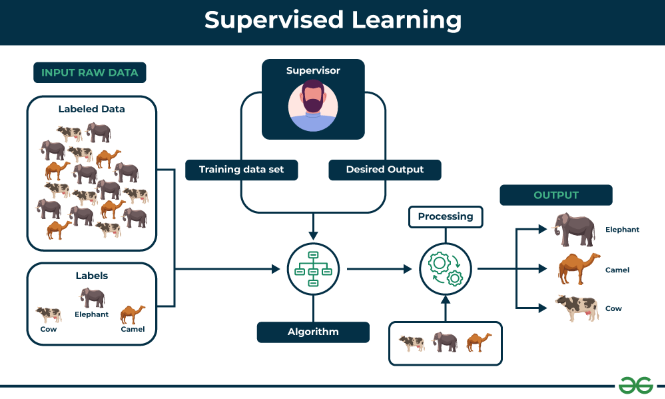

#### 08.01.02 Regression
predicting continuous target variables, which represent numerical values

##### 08.01.02.01 Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
def single_lir(x_var, y_var, save = False, graph = False):
  for i in x_var:
    for j in y_var:
      try:
        title = 'Linear Regression Model ' + i + ' & ' + j
        x = np.array(df[i])
        y = np.array(df[j])
        x = x.reshape(-1, 1)
        model = LinearRegression()
        train = model.fit(x, y)
        y_predicted = model.predict(x)
        training_score = model.score(x, y)

        print('=' * 100)
        print(title)
        print('-' * 100)
        print('Training Score : ', str(round(training_score * 100, 2)), '%')
        print('Coefficients : ', model.coef_)
        print('Mean Squared Error: %.2f' % mean_squared_error(y, y_predicted))
        print('Coefficient of Determination: %.2f' % r2_score(y, y_predicted))
        print('-' * 100)

        if save == True:
          with open(title + '.sav', 'wb') as f:
            pickle.dump(train, f)
            print(title, 'has been saved')
            print('=' * 100)
        else:
          pass

        if graph == True:
          plt.scatter(x, y, color = 'red')
          plt.plot(x, y_predicted, color = 'k')
          plt.xlabel(i)
          plt.ylabel(j)
          plt.show()
        else:
          pass
      except:
        pass

Linear Regression Model property_type & price
----------------------------------------------------------------------------------------------------
Training Score :  3.49 %
Coefficients :  [-1522492.86435867]
Mean Squared Error: 109665321580232.80
Coefficient of Determination: 0.03
----------------------------------------------------------------------------------------------------


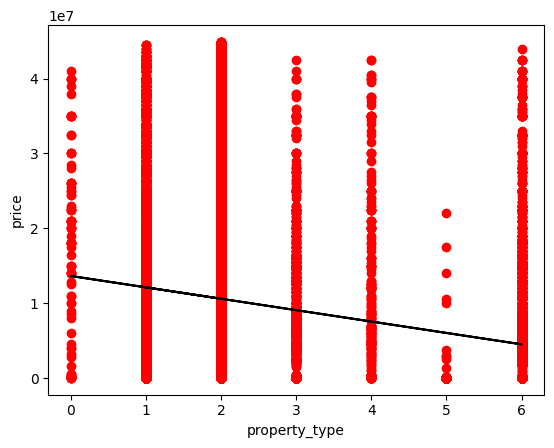

Linear Regression Model city & price
----------------------------------------------------------------------------------------------------
Training Score :  4.44 %
Coefficients :  [2250402.15529712]
Mean Squared Error: 108594131782379.95
Coefficient of Determination: 0.04
----------------------------------------------------------------------------------------------------


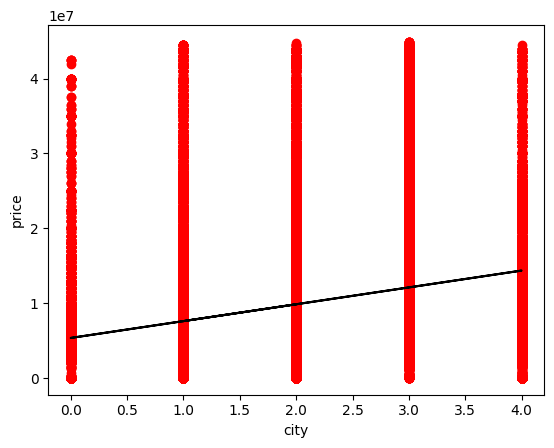

Linear Regression Model baths & price
----------------------------------------------------------------------------------------------------
Training Score :  24.62 %
Coefficients :  [3588159.73118628]
Mean Squared Error: 85653500644297.36
Coefficient of Determination: 0.25
----------------------------------------------------------------------------------------------------


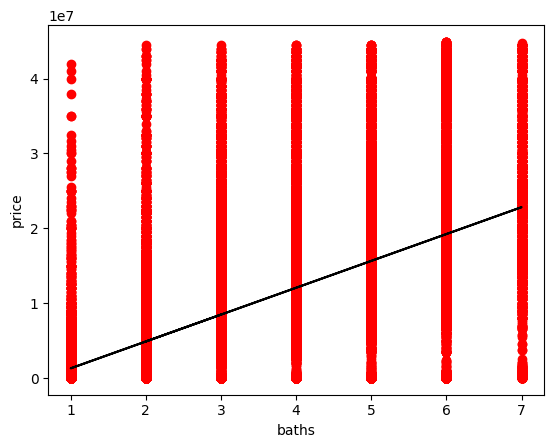

Linear Regression Model purpose & price
----------------------------------------------------------------------------------------------------
Training Score :  37.5 %
Coefficients :  [14432145.0029054]
Mean Squared Error: 71016240180239.09
Coefficient of Determination: 0.38
----------------------------------------------------------------------------------------------------


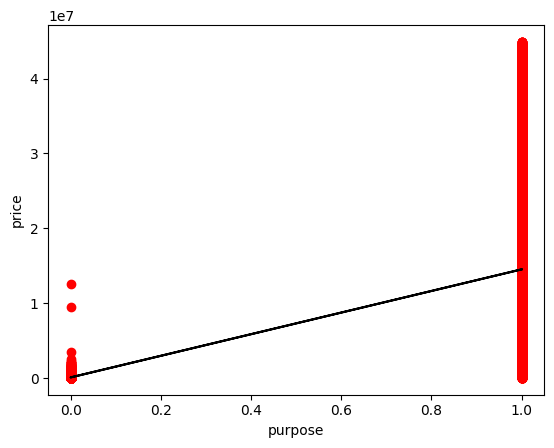

Linear Regression Model bedrooms & price
----------------------------------------------------------------------------------------------------
Training Score :  21.57 %
Coefficients :  [3941697.73979051]
Mean Squared Error: 89127909284247.75
Coefficient of Determination: 0.22
----------------------------------------------------------------------------------------------------


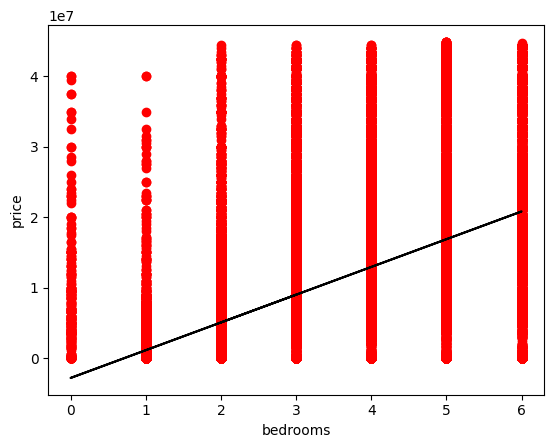

Linear Regression Model Area_in_Marla & price
----------------------------------------------------------------------------------------------------
Training Score :  2.12 %
Coefficients :  [207937.77852176]
Mean Squared Error: 111223998230681.92
Coefficient of Determination: 0.02
----------------------------------------------------------------------------------------------------


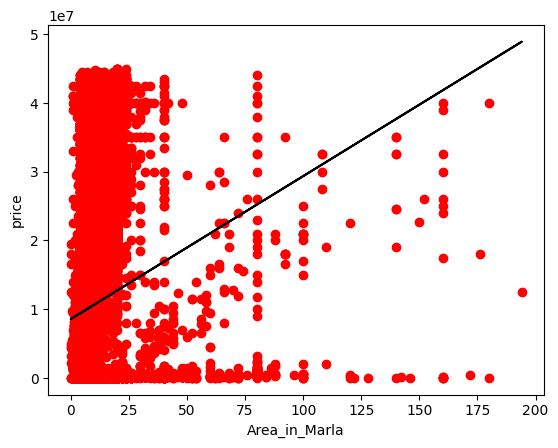

In [69]:
single_lir(x_var, y_var, save = False, graph = True)

In [70]:
def multi_lir(x_var, y_var, save = False):
  try:
    title = 'Multi Linear Regression Model'
    x = np.array(df[x_var])
    y = np.array(df[y_var])
    model = LinearRegression()
    train = model.fit(x, y)
    y_predicted = model.predict(x)
    training_score = model.score(x, y)

    print('=' * 100)
    print(title)
    print('-' * 100)
    print('Training Score : ', str(round(training_score * 100, 2)), '%')
    print('Coefficients : ', model.coef_)
    print('Mean Squared Error: %.2f' % mean_squared_error(y, y_predicted))
    print('Coefficient of Determination: %.2f' % r2_score(y, y_predicted))
    print('-' * 100)

    if save == True:
      with open(title + '.sav', 'wb') as f:
        pickle.dump(train, f)
        print(title, 'has been saved')
        print('=' * 100)
    else:
      pass
  except:
    pass

In [71]:
multi_lir(x_var, y_var, save = False)

Multi Linear Regression Model
----------------------------------------------------------------------------------------------------
Training Score :  58.68 %
Coefficients :  [[   63748.12244279   137939.87508993  2153580.41403581 14617884.48493967
    574740.90961776   259149.02484028]]
Mean Squared Error: 46953730082226.07
Coefficient of Determination: 0.59
----------------------------------------------------------------------------------------------------


##### 08.01.02.02 Polynomial Regression

In [72]:
from sklearn.preprocessing import PolynomialFeatures

In [73]:
def single_pr(x_var, y_var, degree = 5, save = False, graph = False):
  for i in x_var:
    for j in y_var:
      try:
        title = 'Polynomial Regression Model ' + i + ' & ' + j
        model = LinearRegression()
        poly = PolynomialFeatures(degree = degree, include_bias = True)
        x = np.array(df[i])
        y = np.array(df[j])
        x_poly = poly.fit_transform(x.reshape(-1, 1))
        train = model.fit(x_poly, y)
        y_predicted = model.predict(x_poly)
        training_score = model.score(x_poly, y)

        print('=' * 100)
        print(title)
        print('-' * 100)
        print('Training Score : ', str(round(training_score * 100, 2)), '%')
        print('Coefficients : ', model.coef_)
        print('Mean Squared Error: %.2f' % mean_squared_error(y, y_predicted))
        print('Coefficient of Determination: %.2f' % r2_score(y, y_predicted))
        print('-' * 100)

        if save == True:
          with open(title + '.sav', 'wb') as f:
            pickle.dump(train, f)
            print(title, 'has been saved')
            print('=' * 100)
        else:
          pass

        if graph == True:
          plt.scatter(x, y, color = 'red')
          plt.plot(x, y_predicted, color = 'k')
          plt.xlabel(i)
          plt.ylabel(j)
          plt.show()
        else:
          pass
      except:
        pass

Polynomial Regression Model property_type & price
----------------------------------------------------------------------------------------------------
Training Score :  16.44 %
Coefficients :  [        0.         -47419818.96305849  67897207.6972006
 -33662348.2090537    6634781.13735123   -450071.07732555]
Mean Squared Error: 94949318884205.03
Coefficient of Determination: 0.16
----------------------------------------------------------------------------------------------------


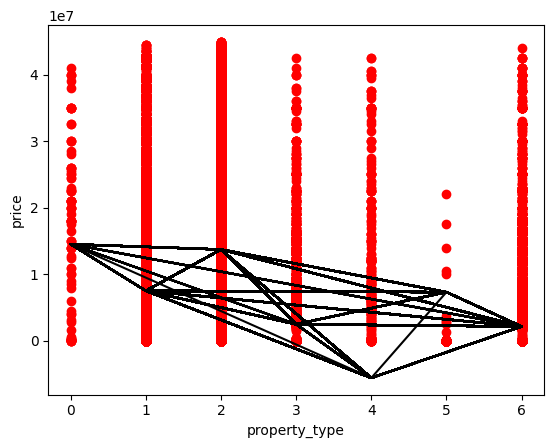

Polynomial Regression Model city & price
----------------------------------------------------------------------------------------------------
Training Score :  14.57 %
Coefficients :  [ 0.00000000e+00 -3.11906333e+16  6.49804861e+16 -4.54863402e+16
  1.29960972e+16 -1.29960972e+15]
Mean Squared Error: 97078514987893.33
Coefficient of Determination: 0.15
----------------------------------------------------------------------------------------------------


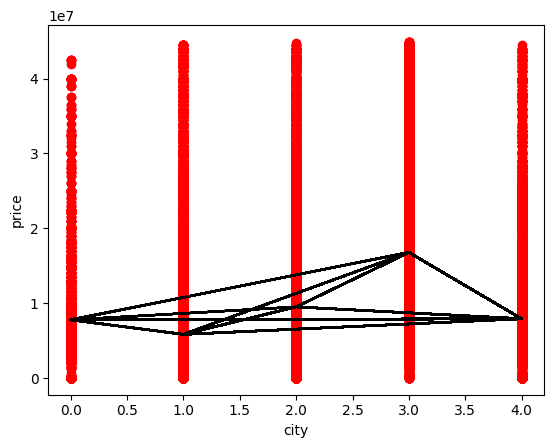

Polynomial Regression Model baths & price
----------------------------------------------------------------------------------------------------
Training Score :  25.03 %
Coefficients :  [        0.         -18737640.53944106  13074453.83903562
  -3642013.42528147    489196.73798927    -25383.92103171]
Mean Squared Error: 85189850209334.38
Coefficient of Determination: 0.25
----------------------------------------------------------------------------------------------------


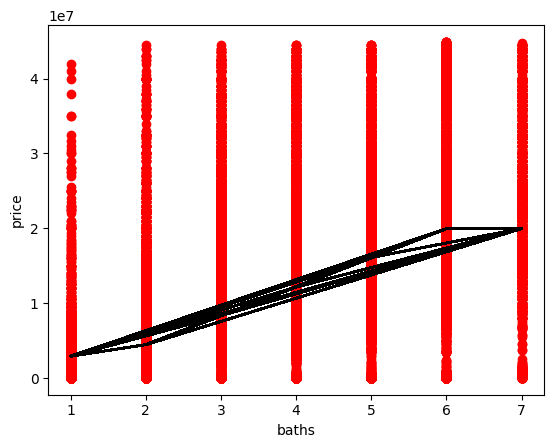

Polynomial Regression Model purpose & price
----------------------------------------------------------------------------------------------------
Training Score :  37.5 %
Coefficients :  [ 0.00000000e+00  1.03356386e+19 -2.58390966e+18 -2.58390966e+18
 -2.58390966e+18 -2.58390966e+18]
Mean Squared Error: 71016716456957.66
Coefficient of Determination: 0.38
----------------------------------------------------------------------------------------------------


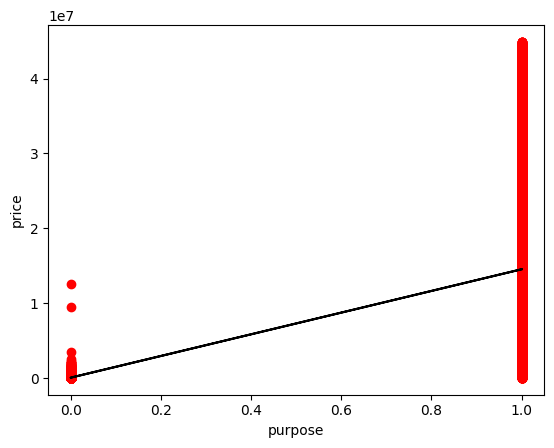

Polynomial Regression Model bedrooms & price
----------------------------------------------------------------------------------------------------
Training Score :  23.44 %
Coefficients :  [        0.         -11731176.11933579   8575476.59494395
  -2481769.97427277    403342.55864576    -27738.60340584]
Mean Squared Error: 86995368768281.61
Coefficient of Determination: 0.23
----------------------------------------------------------------------------------------------------


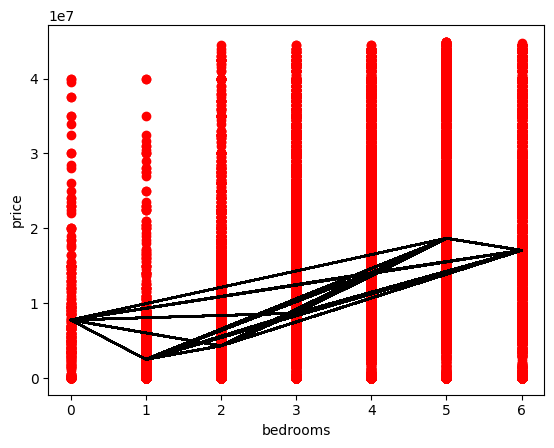

Polynomial Regression Model Area_in_Marla & price
----------------------------------------------------------------------------------------------------
Training Score :  12.76 %
Coefficients :  [ 0.00000000e+00  2.84597030e+06 -1.40516584e+05  2.31869949e+03
 -1.50334749e+01  3.34039875e-02]
Mean Squared Error: 99138522406234.66
Coefficient of Determination: 0.13
----------------------------------------------------------------------------------------------------


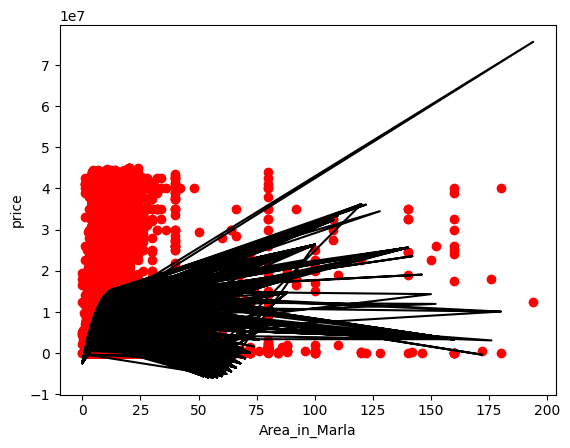

In [74]:
single_pr(x_var, y_var, degree = 5, save = False, graph = True)

In [75]:
def multi_pr(x_var, y_var, degree = 5, save = False):
  try:
    title = 'Multi Polynomial Regression Model'
    model = LinearRegression()
    poly = PolynomialFeatures(degree = degree, include_bias = True)
    x = np.array(df[x_var])
    y = np.array(df[y_var])
    x_poly = poly.fit_transform(x)
    train = model.fit(x_poly, y)
    y_predicted = model.predict(x_poly)
    training_score = model.score(x_poly, y)

    print('=' * 100)
    print(title)
    print('-' * 100)
    print('Training Score : ', str(round(training_score * 100, 2)), '%')
    print('Coefficients : ', model.coef_)
    print('Mean Squared Error: %.2f' % mean_squared_error(y, y_predicted))
    print('Coefficient of Determination: %.2f' % r2_score(y, y_predicted))
    print('-' * 100)

    if save == True:
      with open(title + '.sav', 'wb') as f:
        pickle.dump(train, f)
        print(title, 'has been saved')
        print('=' * 100)
    else:
      pass
  except:
    pass

In [76]:
multi_pr(x_var, y_var, degree = 5, save = False)

Multi Polynomial Regression Model
----------------------------------------------------------------------------------------------------
Training Score :  81.21 %
Coefficients :  [[-8.85229428e-01  3.46653188e+06  2.61738203e+06  4.91605418e+06
  -2.58837048e+05  4.53938873e+06 -4.11086030e+06 -6.81505984e+05
  -8.43255536e+06  3.40978790e+06  5.08798479e+06 -8.19216711e+06
   1.79148325e+06  4.49229706e+05 -2.00570091e+06 -1.89592267e+06
   1.06326831e+06  2.32455812e+06 -3.83619641e+06 -3.89002068e+06
  -2.42508300e+06  9.33991852e+05 -2.58836337e+05  6.41636064e+05
   1.13430588e+06 -4.00773050e+06  2.31698707e+06 -3.03034934e+04
  -9.52327403e+05  3.98530653e+06 -5.57466784e+05 -4.33270409e+06
   3.23200991e+06 -3.98240429e+05  3.34308147e+06 -3.11786584e+06
  -6.75226409e+04  1.41403443e+06 -6.01283003e+05 -1.43876324e+06
   1.92609961e+06 -1.97971901e+05  4.62918178e+05  5.08798480e+06
   4.85579526e+04 -8.93938572e+05  2.39842517e+06 -8.00178876e+05
  -2.26734193e+04 -1.09511025e+

##### 08.01.02.03 Lasso Regression

In [77]:
from sklearn.linear_model import Lasso

In [78]:
def single_lar(x_var, y_var, alpha = 0.01, save = False, graph = False):
  for i in x_var:
    for j in y_var:
      try:
        title = 'Lasso Regression Model ' + i + ' & ' + j
        model = Lasso(alpha = alpha, max_iter = 200, tol = 0.1)
        x = np.array(df[i])
        y = np.array(df[j])
        x = x.reshape(-1, 1)
        train = model.fit(x, y)
        y_predicted = model.predict(x)
        training_score = model.score(x, y)

        print('=' * 100)
        print(title)
        print('-' * 100)
        print('Training Score : ', str(round(training_score * 100, 2)), '%')
        print('Coefficients : ', model.coef_)
        print('Mean Squared Error: %.2f' % mean_squared_error(y, y_predicted))
        print('Coefficient of Determination: %.2f' % r2_score(y, y_predicted))
        print('-' * 100)

        if save == True:
          with open(title + '.sav', 'wb') as f:
            pickle.dump(train, f)
            print(title, 'has been saved')
            print('=' * 100)
        else:
          pass

        if graph == True:
          plt.scatter(x, y, color = 'red')
          plt.plot(x, y_predicted, color = 'k')
          plt.xlabel(i)
          plt.ylabel(j)
          plt.show()
        else:
          pass
      except:
        pass

Lasso Regression Model property_type & price
----------------------------------------------------------------------------------------------------
Training Score :  3.49 %
Coefficients :  [-1522492.86430027]
Mean Squared Error: 109665321580232.80
Coefficient of Determination: 0.03
----------------------------------------------------------------------------------------------------


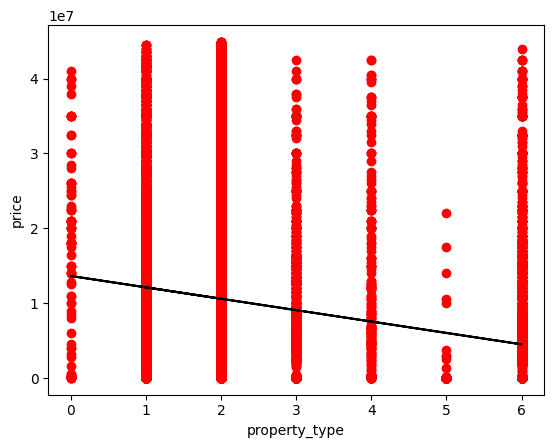

Lasso Regression Model city & price
----------------------------------------------------------------------------------------------------
Training Score :  4.44 %
Coefficients :  [2250402.15519664]
Mean Squared Error: 108594131782379.95
Coefficient of Determination: 0.04
----------------------------------------------------------------------------------------------------


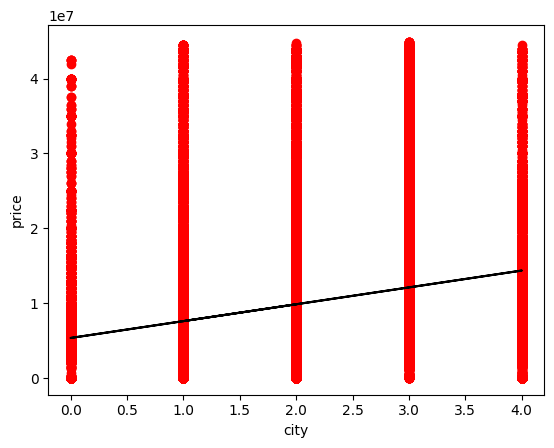

Lasso Regression Model baths & price
----------------------------------------------------------------------------------------------------
Training Score :  24.62 %
Coefficients :  [3588159.73114026]
Mean Squared Error: 85653500644297.36
Coefficient of Determination: 0.25
----------------------------------------------------------------------------------------------------


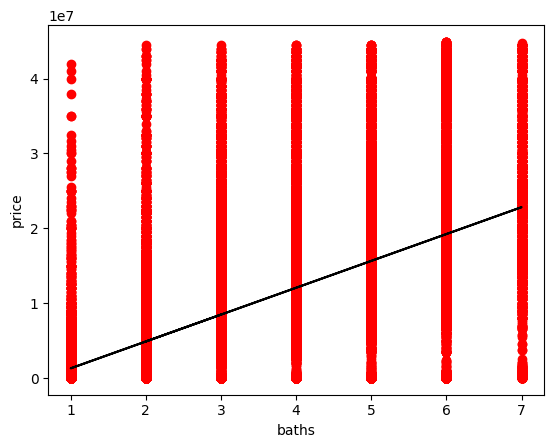

Lasso Regression Model purpose & price
----------------------------------------------------------------------------------------------------
Training Score :  37.5 %
Coefficients :  [14432145.00241664]
Mean Squared Error: 71016240180239.09
Coefficient of Determination: 0.38
----------------------------------------------------------------------------------------------------


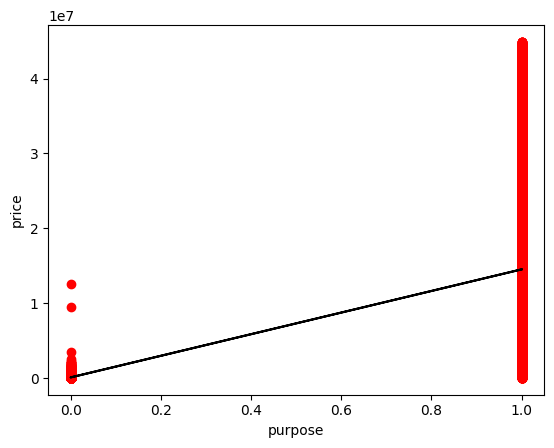

Lasso Regression Model bedrooms & price
----------------------------------------------------------------------------------------------------
Training Score :  21.57 %
Coefficients :  [3941697.73972712]
Mean Squared Error: 89127909284247.73
Coefficient of Determination: 0.22
----------------------------------------------------------------------------------------------------


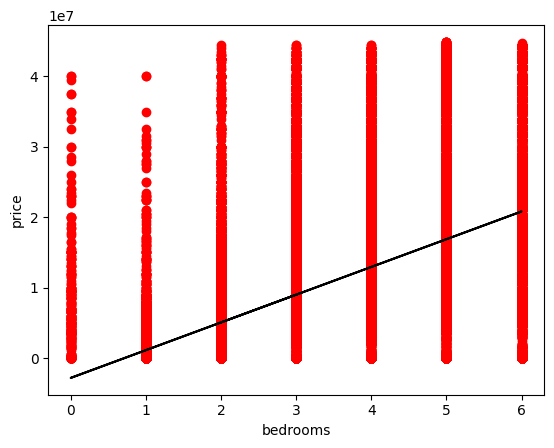

Lasso Regression Model Area_in_Marla & price
----------------------------------------------------------------------------------------------------
Training Score :  2.12 %
Coefficients :  [207937.77851997]
Mean Squared Error: 111223998230681.94
Coefficient of Determination: 0.02
----------------------------------------------------------------------------------------------------


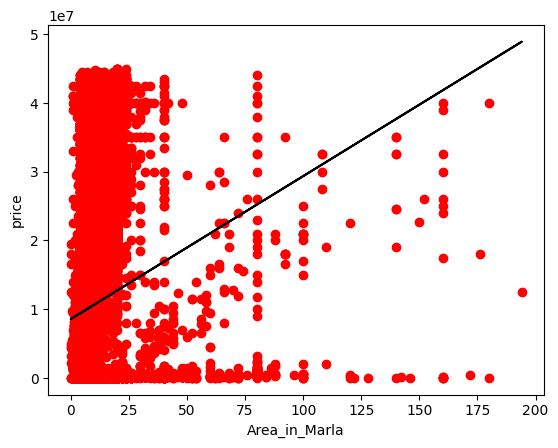

In [79]:
single_lar(x_var, y_var, alpha = 0.0001, save = False, graph = True)

In [80]:
def multi_lar(x_var, y_var, alpha = 0.01, save = False):
  try:
    title = 'Multi Lasso Regression Model'
    model = Lasso(alpha = alpha, max_iter = 200, tol = 0.1)
    x = np.array(df[x_var])
    y = np.array(df[y_var])
    train = model.fit(x, y)
    y_predicted = model.predict(x)
    training_score = model.score(x, y)

    print('=' * 100)
    print(title)
    print('-' * 100)
    print('Training Score : ', str(round(training_score * 100, 2)), '%')
    print('Coefficients : ', model.coef_)
    print('Mean Squared Error: %.2f' % mean_squared_error(y, y_predicted))
    print('Coefficient of Determination: %.2f' % r2_score(y, y_predicted))
    print('-' * 100)

    if save == True:
      with open(title + '.sav', 'wb') as f:
        pickle.dump(train, f)
        print(title, 'has been saved')
        print('=' * 100)
    else:
      pass
  except:
    pass

In [81]:
multi_lar(x_var, y_var, alpha = 0.01, save = False)

Multi Lasso Regression Model
----------------------------------------------------------------------------------------------------
Training Score :  58.68 %
Coefficients :  [   63748.11123134   137939.86231787  2153580.49363953 14617884.42352982
   574740.8321787    259149.02259288]
Mean Squared Error: 46953730082226.05
Coefficient of Determination: 0.59
----------------------------------------------------------------------------------------------------


##### 08.01.02.04 Ridge Regression

In [82]:
from sklearn.linear_model import Ridge

In [83]:
def single_rr(x_var, y_var, alpha = 0.01, save = False, graph = False):
  for i in x_var:
    for j in y_var:
      try:
        title = 'Ridge Regression Model ' + i + ' & ' + j
        model = Ridge(alpha = alpha, max_iter = 100, tol = 0.1)
        x = np.array(df[i])
        y = np.array(df[j])
        x = x.reshape(-1, 1)
        train = model.fit(x, y)
        y_predicted = model.predict(x)
        training_score = model.score(x, y)

        print('=' * 100)
        print(title)
        print('-' * 100)
        print('Training Score : ', str(round(training_score * 100, 2)), '%')
        print('Coefficients : ', model.coef_)
        print('Mean Squared Error: %.2f' % mean_squared_error(y, y_predicted))
        print('Coefficient of Determination: %.2f' % r2_score(y, y_predicted))
        print('-' * 100)

        if save == True:
          with open(title + '.sav', 'wb') as f:
            pickle.dump(train, f)
            print(title, 'has been saved')
            print('=' * 100)
        else:
          pass

        if graph == True:
          plt.scatter(x, y, color = 'red')
          plt.plot(x, y_predicted, color = 'k')
          plt.xlabel(i)
          plt.ylabel(j)
          plt.show()
        else:
          pass
      except:
        pass

Ridge Regression Model property_type & price
----------------------------------------------------------------------------------------------------
Training Score :  3.49 %
Coefficients :  [-1522492.86346503]
Mean Squared Error: 109665321580232.80
Coefficient of Determination: 0.03
----------------------------------------------------------------------------------------------------


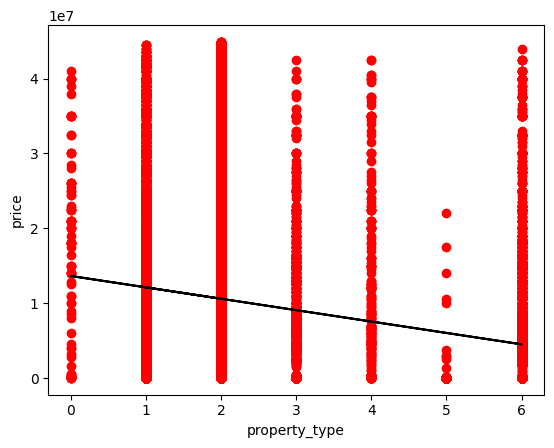

Ridge Regression Model city & price
----------------------------------------------------------------------------------------------------
Training Score :  4.44 %
Coefficients :  [2250402.15302459]
Mean Squared Error: 108594131782379.92
Coefficient of Determination: 0.04
----------------------------------------------------------------------------------------------------


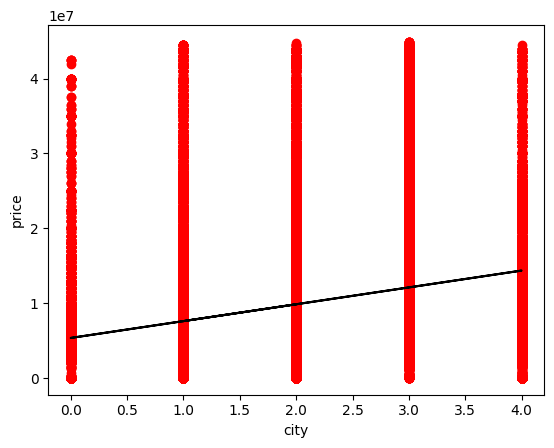

Ridge Regression Model baths & price
----------------------------------------------------------------------------------------------------
Training Score :  24.62 %
Coefficients :  [3588159.72952709]
Mean Squared Error: 85653500644297.34
Coefficient of Determination: 0.25
----------------------------------------------------------------------------------------------------


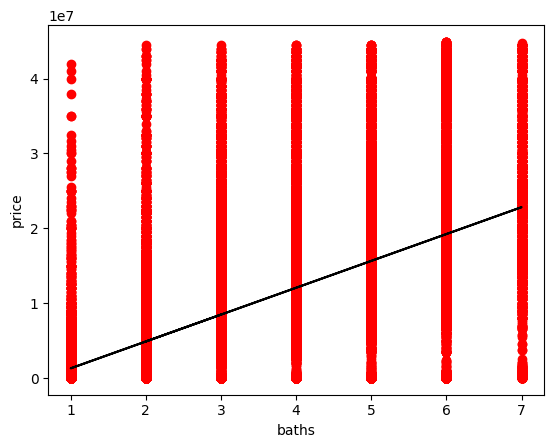

Ridge Regression Model purpose & price
----------------------------------------------------------------------------------------------------
Training Score :  37.5 %
Coefficients :  [14432144.9320165]
Mean Squared Error: 71016240180239.09
Coefficient of Determination: 0.38
----------------------------------------------------------------------------------------------------


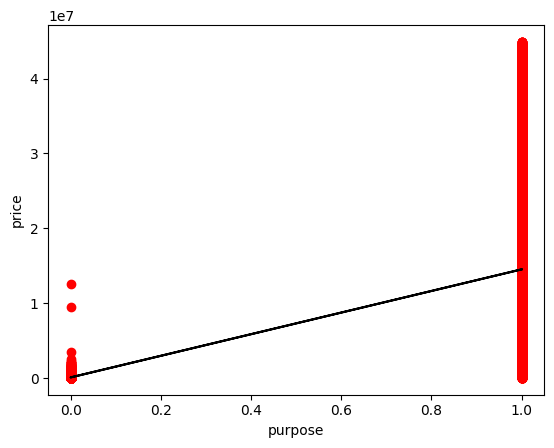

Ridge Regression Model bedrooms & price
----------------------------------------------------------------------------------------------------
Training Score :  21.57 %
Coefficients :  [3941697.7372789]
Mean Squared Error: 89127909284247.75
Coefficient of Determination: 0.22
----------------------------------------------------------------------------------------------------


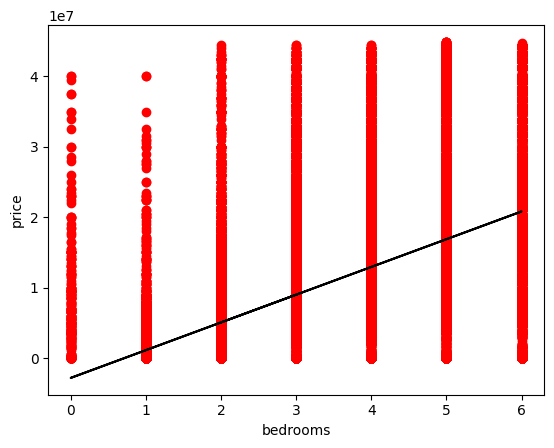

Ridge Regression Model Area_in_Marla & price
----------------------------------------------------------------------------------------------------
Training Score :  2.12 %
Coefficients :  [207937.77851802]
Mean Squared Error: 111223998230681.92
Coefficient of Determination: 0.02
----------------------------------------------------------------------------------------------------


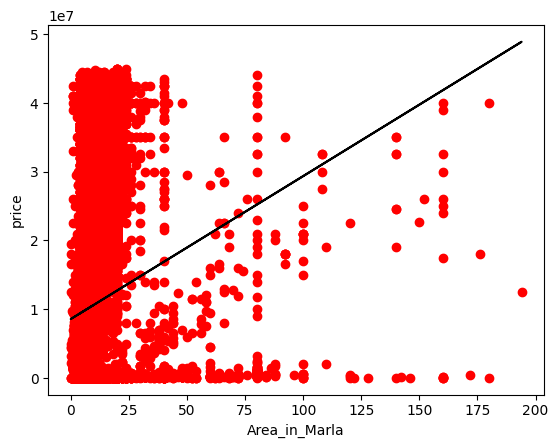

In [84]:
single_rr(x_var, y_var, alpha = 0.0001, save = False, graph = True)

In [85]:
def multi_rr(x_var, y_var, alpha = 0.01, save = False):
  try:
    title = 'Multi Ridge Regression Model'
    model = Ridge(alpha = alpha, max_iter = 100, tol = 0.1)
    x = np.array(df[x_var])
    y = np.array(df[y_var])
    train = model.fit(x, y)
    y_predicted = model.predict(x)
    training_score = model.score(x, y)

    print('=' * 100)
    print(title)
    print('-' * 100)
    print('Training Score : ', str(round(training_score * 100, 2)), '%')
    print('Coefficients : ', model.coef_)
    print('Mean Squared Error: %.2f' % mean_squared_error(y, y_predicted))
    print('Coefficient of Determination: %.2f' % r2_score(y, y_predicted))
    print('-' * 100)

    if save == True:
      with open(title + '.sav', 'wb') as f:
        pickle.dump(train, f)
        print(title, 'has been saved')
        print('=' * 100)
    else:
      pass
  except:
    pass

In [86]:
multi_rr(x_var, y_var, alpha = 0.01, save = False)

Multi Ridge Regression Model
----------------------------------------------------------------------------------------------------
Training Score :  58.68 %
Coefficients :  [[   63747.0882309    137940.7455547   2153580.35815979 14617874.7665995
    574741.59627199   259148.87257431]]
Mean Squared Error: 46953730082240.32
Coefficient of Determination: 0.59
----------------------------------------------------------------------------------------------------


##### 08.01.02.05 Decision tree

In [87]:
from sklearn.tree import DecisionTreeRegressor

In [88]:
def single_dtr(x_var, y_var, save = False, graph = False):
  for i in x_var:
    for j in y_var:
      try:
        title = 'Decision Tree Regressor Model ' + i + ' & ' + j
        model = DecisionTreeRegressor(random_state = 0)
        x = np.array(df[i])
        y = np.array(df[j])
        x = x.reshape(-1, 1)
        train = model.fit(x, y)
        y_predicted = model.predict(x)
        training_score = model.score(x, y)

        print('=' * 100)
        print(title)
        print('-' * 100)
        print('Training Score : ', str(round(training_score * 100, 2)), '%')
        print('Mean Squared Error: %.2f' % mean_squared_error(y, y_predicted))
        print('Coefficient of Determination: %.2f' % r2_score(y, y_predicted))
        print('-' * 100)

        if save == True:
          with open(title + '.sav', 'wb') as f:
            pickle.dump(train, f)
            print(title, 'has been saved')
            print('=' * 100)
        else:
          pass

        if graph == True:
          plt.scatter(x, y, color = 'red')
          plt.plot(x, y_predicted, color = 'k')
          plt.xlabel(i)
          plt.ylabel(j)
          plt.show()
        else:
          pass
      except:
        pass

Decision Tree Regressor Model property_type & price
----------------------------------------------------------------------------------------------------
Training Score :  17.21 %
Mean Squared Error: 94076831445100.59
Coefficient of Determination: 0.17
----------------------------------------------------------------------------------------------------


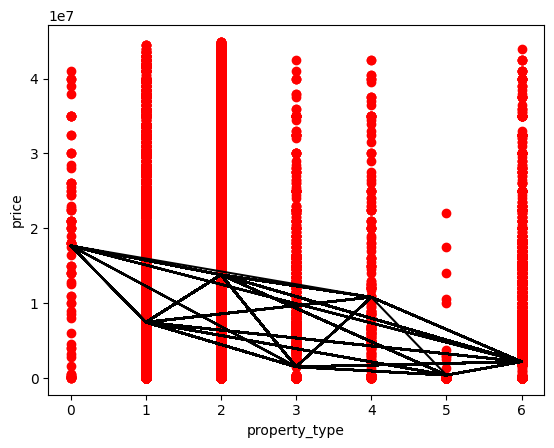

Decision Tree Regressor Model city & price
----------------------------------------------------------------------------------------------------
Training Score :  14.57 %
Mean Squared Error: 97078483282641.84
Coefficient of Determination: 0.15
----------------------------------------------------------------------------------------------------


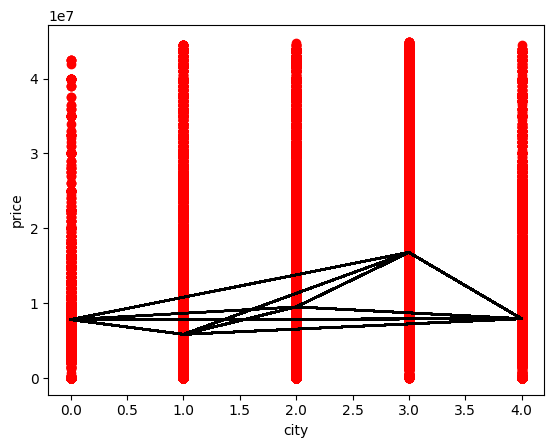

Decision Tree Regressor Model baths & price
----------------------------------------------------------------------------------------------------
Training Score :  25.04 %
Mean Squared Error: 85182202736361.06
Coefficient of Determination: 0.25
----------------------------------------------------------------------------------------------------


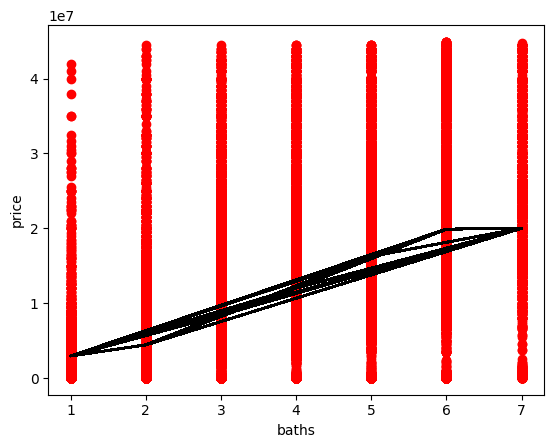

Decision Tree Regressor Model purpose & price
----------------------------------------------------------------------------------------------------
Training Score :  37.5 %
Mean Squared Error: 71016240180239.09
Coefficient of Determination: 0.38
----------------------------------------------------------------------------------------------------


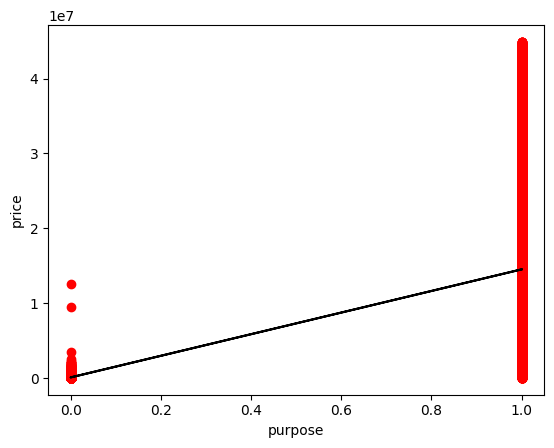

Decision Tree Regressor Model bedrooms & price
----------------------------------------------------------------------------------------------------
Training Score :  23.46 %
Mean Squared Error: 86978186926299.42
Coefficient of Determination: 0.23
----------------------------------------------------------------------------------------------------


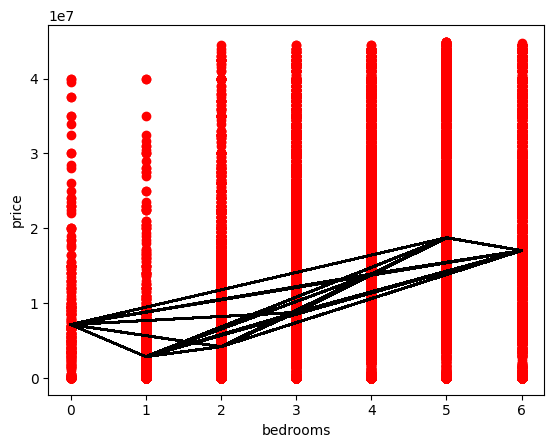

Decision Tree Regressor Model Area_in_Marla & price
----------------------------------------------------------------------------------------------------
Training Score :  17.09 %
Mean Squared Error: 94214881326343.08
Coefficient of Determination: 0.17
----------------------------------------------------------------------------------------------------


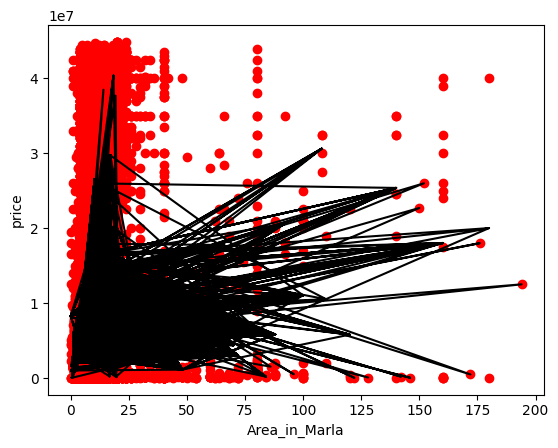

In [89]:
single_dtr(x_var, y_var, save = False, graph = True)

In [90]:
def multi_dtr(x_var, y_var, alpha = 0.01, save = False):
  try:
    title = 'Multi Decision Tree Regressor Model'
    model = DecisionTreeRegressor(random_state = 0)
    x = np.array(df[x_var])
    y = np.array(df[y_var])
    train = model.fit(x, y)
    y_predicted = model.predict(x)
    training_score = model.score(x, y)

    print('=' * 100)
    print(title)
    print('-' * 100)
    print('Training Score : ', str(round(training_score * 100, 2)), '%')
    print('Mean Squared Error: %.2f' % mean_squared_error(y, y_predicted))
    print('Coefficient of Determination: %.2f' % r2_score(y, y_predicted))
    print('-' * 100)

    if save == True:
      with open(title + '.sav', 'wb') as f:
        pickle.dump(train, f)
        print(title, 'has been saved')
        print('=' * 100)
    else:
      pass
  except:
    pass

In [91]:
multi_dtr(x_var, y_var, alpha = 0.01, save = False)

Multi Decision Tree Regressor Model
----------------------------------------------------------------------------------------------------
Training Score :  87.81 %
Mean Squared Error: 13857614551229.98
Coefficient of Determination: 0.88
----------------------------------------------------------------------------------------------------


##### 08.01.02.06 Random Forest Regressor

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
def single_rfr(x_var, y_var, n_estimators = 10, save = False, graph = False):
  for i in x_var:
    for j in y_var:
      try:
        title = 'Random Forest Regressor Model ' + i + ' & ' + j
        model = RandomForestRegressor(n_estimators = n_estimators, random_state = 0)
        x = np.array(df[i])
        y = np.array(df[j])
        x = x.reshape(-1, 1)
        train = model.fit(x, y)
        y_predicted = model.predict(x)
        training_score = model.score(x, y)

        print('=' * 100)
        print(title)
        print('-' * 100)
        print('Training Score : ', str(round(training_score * 100, 2)), '%')
        print('Mean Squared Error: %.2f' % mean_squared_error(y, y_predicted))
        print('Coefficient of Determination: %.2f' % r2_score(y, y_predicted))
        print('-' * 100)

        if save == True:
          with open(title + '.sav', 'wb') as f:
            pickle.dump(train, f)
            print(title, 'has been saved')
            print('=' * 100)
        else:
          pass

        if graph == True:
          plt.scatter(x, y, color = 'red')
          plt.plot(x, y_predicted, color = 'k')
          plt.xlabel(i)
          plt.ylabel(j)
          plt.show()
        else:
          pass
      except:
        pass

Random Forest Regressor Model property_type & price
----------------------------------------------------------------------------------------------------
Training Score :  17.21 %
Mean Squared Error: 94078242920952.14
Coefficient of Determination: 0.17
----------------------------------------------------------------------------------------------------


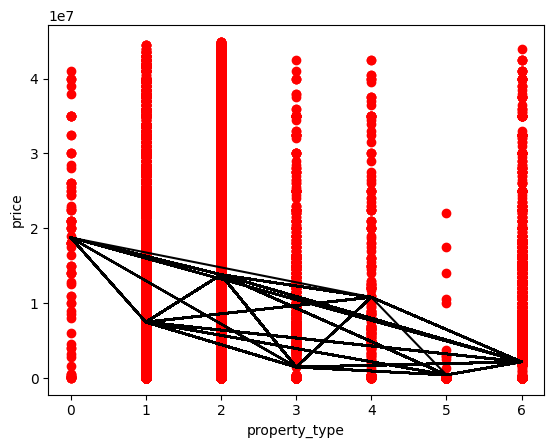

Random Forest Regressor Model city & price
----------------------------------------------------------------------------------------------------
Training Score :  14.57 %
Mean Squared Error: 97079243088771.05
Coefficient of Determination: 0.15
----------------------------------------------------------------------------------------------------


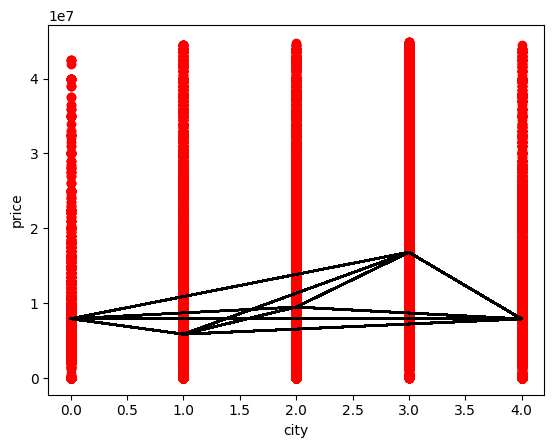

Random Forest Regressor Model baths & price
----------------------------------------------------------------------------------------------------
Training Score :  25.04 %
Mean Squared Error: 85182966784036.73
Coefficient of Determination: 0.25
----------------------------------------------------------------------------------------------------


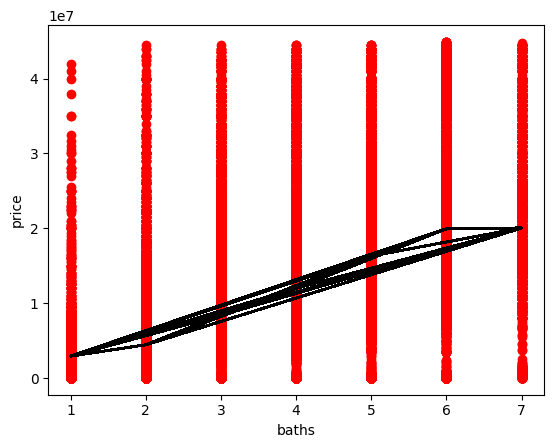

Random Forest Regressor Model purpose & price
----------------------------------------------------------------------------------------------------
Training Score :  37.5 %
Mean Squared Error: 71016351123686.34
Coefficient of Determination: 0.38
----------------------------------------------------------------------------------------------------


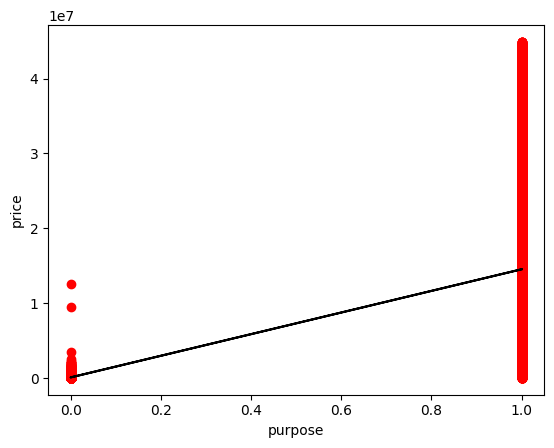

Random Forest Regressor Model bedrooms & price
----------------------------------------------------------------------------------------------------
Training Score :  23.46 %
Mean Squared Error: 86978890877201.02
Coefficient of Determination: 0.23
----------------------------------------------------------------------------------------------------


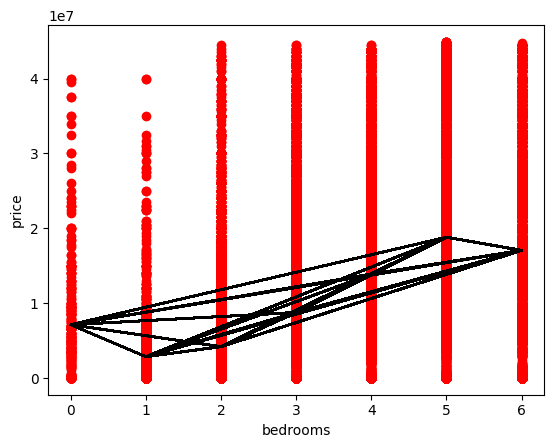

Random Forest Regressor Model Area_in_Marla & price
----------------------------------------------------------------------------------------------------
Training Score :  17.06 %
Mean Squared Error: 94252788177564.06
Coefficient of Determination: 0.17
----------------------------------------------------------------------------------------------------


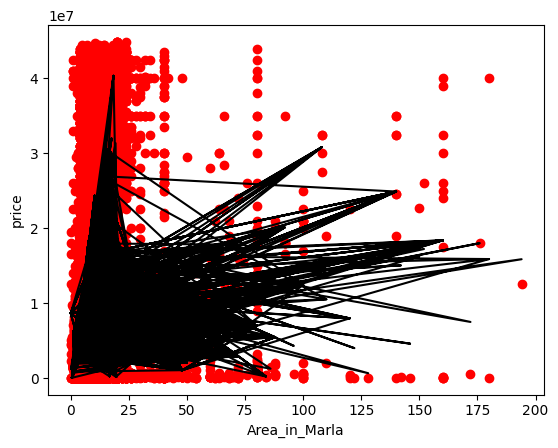

In [94]:
single_rfr(x_var, y_var, n_estimators = 10, save = False, graph = True)

In [95]:
def multi_rfr(x_var, y_var, n_estimators = 10, save = False):
  try:
    title = 'Multi Random Forest Regressor Model'
    model = RandomForestRegressor(n_estimators = n_estimators, random_state = 0)
    x = np.array(df[x_var])
    y = np.array(df[y_var])
    train = model.fit(x, y)
    y_predicted = model.predict(x)
    training_score = model.score(x, y)

    print('=' * 100)
    print(title)
    print('-' * 100)
    print('Training Score : ', str(round(training_score * 100, 2)), '%')
    print('Mean Squared Error: %.2f' % mean_squared_error(y, y_predicted))
    print('Coefficient of Determination: %.2f' % r2_score(y, y_predicted))
    print('-' * 100)

    if save == True:
      with open(title + '.sav', 'wb') as f:
        pickle.dump(train, f)
        print(title, 'has been saved')
        print('=' * 100)
    else:
      pass
  except:
    pass

In [96]:
multi_rfr(x_var, y_var, n_estimators = 10, save = False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Multi Random Forest Regressor Model
----------------------------------------------------------------------------------------------------
Training Score :  87.47 %
Mean Squared Error: 14237222406361.65
Coefficient of Determination: 0.87
----------------------------------------------------------------------------------------------------


##### 08.01.02.07 Grid Search

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [98]:
model_params = {
  'linear_regression' : {
    'model' : LinearRegression(),
    'params' : {
      #'C' : [1, 5, 10]
    }
  },
  'lasso_regression' : {
    'model' : Lasso(),
    'params' : {
      'alpha' : [1, 10, 100],
      'max_iter' : [1, 10, 100],
      'tol' : [0.1, 0.01]
    }
  },
  'ridge_regression' : {
    'model' : Ridge(),
    'params' : {
      'alpha' : [1, 10, 100],
      'max_iter' : [1, 10, 100],
      'tol' : [0.1, 0.01]
    }
  },
  'decision_tree_regressor' : {
    'model' : DecisionTreeRegressor(),
    'params' : {
      'random_state' : [0, 42]
    }
  },
  'random_forest_regressor' : {
    'model' : RandomForestRegressor(),
    'params' : {
      'n_estimators' : [1, 5, 10],
      'random_state' : [0, 42]
    }
  },
}

In [99]:
def single_gsc(x_var, y_var, model_params, cv = 5):
  try:
    scores = []

    for i in x_var:
      for j in y_var:
        x = np.array(df[i])
        y = np.array(df[j])
        x = x.reshape(-1, 1)

        for model_name, mp in model_params.items():
          model = GridSearchCV(mp['model'], mp['params'], cv = cv, return_train_score = False)
          model.fit(x, y)
          scores.append({
              'model': model_name + ' ' + i + ' & ' + j,
              'best_score': model.best_score_,
              'best_params': model.best_params_
          })

    tune_df = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])
    tune_df = tune_df.sort_values('best_score', ascending = False)
    tune_df = tune_df.reset_index(drop = True)

    display(tune_df)
  except:
    pass

In [100]:
single_gsc(x_var, y_var, model_params, cv = 2)

model  best_score  \
0         random_forest_regressor purpose & price    0.369133   
1                ridge_regression purpose & price    0.368488   
2                lasso_regression purpose & price    0.368456   
3         decision_tree_regressor purpose & price    0.368456   
4               linear_regression purpose & price    0.368456   
5           random_forest_regressor baths & price    0.247542   
6           decision_tree_regressor baths & price    0.247093   
7                  ridge_regression baths & price    0.244910   
8                  lasso_regression baths & price    0.244907   
9                 linear_regression baths & price    0.244907   
10       random_forest_regressor bedrooms & price    0.230193   
11       decision_tree_regressor bedrooms & price    0.230157   
12              ridge_regression bedrooms & price    0.211724   
13              lasso_regression bedrooms & price    0.211710   
14             linear_regression bedrooms & price    0.211710   
15  random_forest_regressor property_type & price    0.167448   
16  decision_tree_regressor property_type & price    0.167448   
17  random_forest_regressor Area_in_Marla & price    0.148997   
18  decision_tree_regressor Area_in_Marla & price    0.147643   
19           random_forest_regressor city & price    0.131373   
20           decision_tree_regressor city & price    0.129483   
21                  ridge_regression city & price    0.041356   
22                  lasso_regression city & price    0.041338   
23                 linear_regression city & price    0.041338   
24         ridge_regression property_type & price    0.032676   
25        linear_regression property_type & price    0.032675   
26         lasso_regression property_type & price    0.032675   
27         ridge_regression Area_in_Marla & price    0.018448   
28         lasso_regression Area_in_Marla & price    0.018448   
29        linear_regression Area_in_Marla & price    0.018448   

                                  best_params  
0      {'n_estimators': 1, 'random_state': 0}  
1   {'alpha': 100, 'max_iter': 1, 'tol': 0.1}  
2   {'alpha': 100, 'max_iter': 1, 'tol': 0.1}  
3                         {'random_state': 0}  
4                                          {}  
5      {'n_estimators': 1, 'random_state': 0}  
6                         {'random_state': 0}  
7   {'alpha': 100, 'max_iter': 1, 'tol': 0.1}  
8   {'alpha': 100, 'max_iter': 1, 'tol': 0.1}  
9                                          {}  
10     {'n_estimators': 1, 'random_state': 0}  
11                        {'random_state': 0}  
12  {'alpha': 100, 'max_iter': 1, 'tol': 0.1}  
13  {'alpha': 100, 'max_iter': 1, 'tol': 0.1}  
14                                         {}  
15    {'n_estimators': 10, 'random_state': 0}  
16                        {'random_state': 0}  
17    {'n_estimators': 10, 'random_state': 0}  
18                        {'random_state': 0}  
19     {'n_estimators': 1, 'random_state': 0}  
20                        {'random_state': 0}  
21  {'alpha': 100, 'max_iter': 1, 'tol': 0.1}  
22  {'alpha': 100, 'max_iter': 1, 'tol': 0.1}  
23                                         {}  
24  {'alpha': 100, 'max_iter': 1, 'tol': 0.1}  
25                                         {}  
26    {'alpha': 1, 'max_iter': 1, 'tol': 0.1}  
27  {'alpha': 100, 'max_iter': 1, 'tol': 0.1}  
28  {'alpha': 100, 'max_iter': 1, 'tol': 0.1}  
29                                         {}

In [101]:
def multi_gsc(x_var, y_var, model_params, cv = 5):
  try:
    scores = []

    x = np.array(df[x_var])
    y = np.array(df[y_var])

    for model_name, mp in model_params.items():
      model = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score = False)
      model.fit(x, y)
      scores.append({
          'model': model_name + ' ' + i + ' & ' + j,
          'best_score': model.best_score_,
          'best_params': model.best_params_
      })

    tune_df = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])
    tune_df = tune_df.sort_values('best_score', ascending = False)
    tune_df = tune_df.reset_index(drop = True)

    display(tune_df)
  except:
    pass

In [102]:
multi_gsc(x_var, y_var, model_params, cv = 2)

##### 08.01.02.08 Xgboost Regression

In [103]:
def xgb_single_lir(x_var, y_var, save = False, n_estimators = 10, tree = False):
  for i in x_var:
    for j in y_var:
      try:
        title = 'XGB Regression Model ' + i + ' & ' + j
        x = np.array(df[i])
        y = np.array(df[j])
        x = x.reshape(-1, 1)
        model = xgb.XGBRegressor(objective = 'reg:linear', n_estimators = n_estimators, seed = 123)
        train = model.fit(x, y)
        y_predicted = model.predict(x)

        print('=' * 100)
        print(title)
        print('-' * 100)
        print('Mean Squared Error: %.2f' % mean_squared_error(y, y_predicted))
        print('Coefficient of Determination: %.2f' % r2_score(y, y_predicted))
        print('-' * 100)

        if save == True:
          with open(title + '.sav', 'wb') as f:
            pickle.dump(train, f)
            print(title, 'has been saved')
            print('=' * 100)
        else:
          pass

        if tree == True:
          xgb.plot_tree(model, num_trees = 0)
          xgb.plot_tree(model, num_trees = 9, rankdir = 'LR')
          xgb.plot_importance(model)
          plt.show()
        else:
          pass
      except:
        pass

In [104]:
xgb_single_lir(x_var, y_var, save = False, n_estimators = 10, tree = False)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:04] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:04] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:04] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGB Regression Model property_type & price
----------------------------------------------------------------------------------------------------
Mean Squared Error: 94092459130498.39
Coefficient of Determination: 0.17
----------------------------------------------------------------------------------------------------
XGB Regression Model city & price
----------------------------------------------------------------------------------------------------
Mean Squared Error: 97091698801743.56
Coefficient of Determination: 0.15
----------------------------------------------------------------------------------------------------
XGB Regression Model baths & price
----------------------------------------------------------------------------------------------------
Mean Squared Error: 85204926671643.11
Coefficient of Determination: 0.25
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:05] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:05] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:05] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGB Regression Model purpose & price
----------------------------------------------------------------------------------------------------
Mean Squared Error: 71050254686176.62
Coefficient of Determination: 0.37
----------------------------------------------------------------------------------------------------
XGB Regression Model bedrooms & price
----------------------------------------------------------------------------------------------------
Mean Squared Error: 86999472658428.55
Coefficient of Determination: 0.23
----------------------------------------------------------------------------------------------------
XGB Regression Model Area_in_Marla & price
----------------------------------------------------------------------------------------------------
Mean Squared Error: 94781584839129.66
Coefficient of Determination: 0.17
----------------------------------------------------------------------------------------------------


In [105]:
def xgb_regressor(x_var, y_var, save = False, num_round = 5):
  for i in x_var:
    for j in y_var:
      try:
        title = 'XGB Regressor Model ' + i + ' & ' + j
        x = np.array(df[i])
        y = np.array(df[j])
        x = x.reshape(-1, 1)
        dmatrix = xgb.DMatrix(data = x, label = y)
        params = {
          'booster' : 'gblinear',
          'objective' : 'reg:linear'
        }
        model = xgb.train(params = params, dtrain = dmatrix, num_boost_round = num_round)
        #y_predicted = model.predict(dmatrix)
        preds = model.predict(dmatrix)
        y_predicted = np.asarray([np.argmax(line) for line in preds])

        print('=' * 100)
        print(title)
        print('-' * 100)
        print('Mean Squared Error: %.2f' % mean_squared_error(y, y_predicted))
        print('Coefficient of Determination: %.2f' % r2_score(y, y_predicted))
        print('-' * 100)

        if save == True:
          with open(title + '.sav', 'wb') as f:
            pickle.dump(model, f)
            print(title, 'has been saved')
            print('=' * 100)
        else:
          pass
      except:
        pass

In [106]:
xgb_regressor(x_var, y_var, save = False, num_round = 5)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:05] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGB Regressor Model property_type & price
----------------------------------------------------------------------------------------------------
Mean Squared Error: 221294126259786.94
Coefficient of Determination: -0.95
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:05] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGB Regressor Model city & price
----------------------------------------------------------------------------------------------------
Mean Squared Error: 221294126259786.94
Coefficient of Determination: -0.95
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:06] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGB Regressor Model baths & price
----------------------------------------------------------------------------------------------------
Mean Squared Error: 221294126259786.94
Coefficient of Determination: -0.95
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:06] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGB Regressor Model purpose & price
----------------------------------------------------------------------------------------------------
Mean Squared Error: 221294126259786.94
Coefficient of Determination: -0.95
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:07] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGB Regressor Model bedrooms & price
----------------------------------------------------------------------------------------------------
Mean Squared Error: 221294126259786.94
Coefficient of Determination: -0.95
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:08] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGB Regressor Model Area_in_Marla & price
----------------------------------------------------------------------------------------------------
Mean Squared Error: 221294126259786.94
Coefficient of Determination: -0.95
----------------------------------------------------------------------------------------------------


In [107]:
def xgb_regcv_v1(x, y, nfold = 3, num_round = 10, seed = 123):
  try:
    dmatrix = xgb.DMatrix(data = x, label = y)
    params = {
      'objective' : 'reg:linear',
      'max_depth' : 3,
      'colsample_bytree': 0.5,
      'subsample' : 0.75,
      'gamma' : 0.25,
      'learning_rate' : 0.3,
      'reg_alpha' : 0.01,
    }
    df = xgb.cv(dtrain = dmatrix, params = params, nfold = nfold, num_boost_round = num_round, seed = num_round, metrics = 'rmse')

    print('XGB Regressor Cross Validation v1')
    print('=' * 100)

    display(df)
  except:
    pass

In [108]:
xgb_regcv_v1(x, y, nfold = 3, num_round = 10, seed = 123)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:09] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGB Regressor Cross Validation v1


train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0     8.888451e+06    10766.755217    8.888621e+06   39513.708241
1     7.773622e+06     7752.722927    7.775168e+06   32786.691018
2     6.533030e+06     9582.881809    6.535262e+06   24640.305329
3     6.158565e+06     6231.919771    6.159825e+06   24683.769185
4     5.868518e+06     8740.708831    5.870379e+06   21675.309609
5     5.804186e+06    12868.818099    5.806377e+06   16953.782124
6     5.400403e+06    20572.144016    5.402566e+06   12690.828540
7     5.361183e+06    20464.423584    5.363600e+06   12530.729860
8     5.341309e+06    20017.889942    5.343963e+06   12658.176669
9     5.246165e+06    19577.031783    5.249266e+06   14172.676163

In [109]:
def xgb_regcv_v2(x, y, nfold = 3, num_round = 10, seed = 123):
  try:
    dmatrix = xgb.DMatrix(data = x, label = y)
    params = {
      'objective' : 'reg:linear',
      'max_depth' : 3,
      'colsample_bytree': 0.5,
      'subsample' : 0.75,
      'gamma' : 0.25,
      'learning_rate' : 0.3,
      'reg_alpha' : 0.01,
      'silent' : 1
    }
    df = xgb.cv(dtrain = dmatrix, params = params, nfold = nfold, num_boost_round = num_round, seed = num_round, metrics = 'mae')

    print('XGB Regressor Cross Validation v2')
    print('=' * 100)

    display(df)
  except:
    pass

In [110]:
xgb_regcv_v2(x, y, nfold = 3, num_round = 10, seed = 123)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:11] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


XGB Regressor Cross Validation v2


train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0    6.874329e+06   13809.791068   6.874488e+06  31163.346928
1    5.825955e+06   12764.928590   5.827728e+06  24804.603440
2    4.745131e+06   12284.867557   4.746543e+06  18223.823733
3    4.332311e+06   10611.832800   4.332839e+06  17596.309638
4    4.080453e+06   12284.300935   4.081492e+06  16124.543721
5    3.998977e+06   10866.902780   4.000529e+06  15389.588848
6    3.624743e+06   14466.017973   3.626576e+06  11630.003454
7    3.574081e+06   14142.629899   3.575916e+06  11103.864996
8    3.543788e+06   15238.127220   3.545770e+06   9671.299615
9    3.465097e+06   13829.074035   3.467553e+06   9199.553703

In [111]:
def xgb_regcv_v3(x, y, nfold = 3, num_round = 10, seed = 123):
  try:
    dmatrix = xgb.DMatrix(data = x, label = y)
    reg_params = [1, 10, 100]
    params = {
      'objective' : 'reg:linear',
      'max_depth' : 3,
      'colsample_bytree': 0.5,
      'subsample' : 0.75,
      'gamma' : 0.25,
      'learning_rate' : 0.3,
      'reg_alpha' : 0.01,
      'silent' : 1
    }

    rmses = []
    for reg in reg_params:
      params['lambda'] = reg
      model = xgb.cv(
        dtrain = dmatrix,
        params = params,
        #nfold = nfold,
        num_boost_round = num_round,
        metrics = 'rmse',
        as_pandas = True,
        seed = 123
      )
      rmses.append(model['test-rmse-mean'].tail(1).values[0])

    print('XGB Regressor Cross Validation v3')
    print('=' * 100)
    print('Best RMSE as a Function of l2 :')
    print(pd.DataFrame(list(zip(reg_params, rmses)), columns = ['l2', 'rmse']))
  except:
    pass

In [112]:
xgb_regcv_v3(x, y, nfold = 3, num_round = 10, seed = 123)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:13] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:14] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


XGB Regressor Cross Validation v3
Best RMSE as a Function of l2 :
    l2          rmse
0    1  5.248274e+06
1   10  5.249684e+06
2  100  5.270043e+06


In [113]:
def xgb_regcv_v4(x, y, nfold = 3, seed = 123):
  try:
    dmatrix = xgb.DMatrix(data = x, label = y)
    num_rounds = [5, 10, 15]
    params = {
      'objective' : 'reg:linear',
      'max_depth' : 3,
      'colsample_bytree': 0.5,
      'subsample' : 0.75,
      'gamma' : 0.25,
      'learning_rate' : 0.3,
      'reg_alpha' : 0.01,
      'silent' : 1
    }

    rmses = []
    for round in num_rounds:
      model = xgb.cv(
        dtrain = dmatrix,
        params = params,
        nfold = nfold,
        num_boost_round = round,
        metrics = 'rmse',
        as_pandas = True,
        seed = 123
      )
      rmses.append(model['test-rmse-mean'].tail().values[-1])

    print('XGB Regressor Cross Validation v4')
    print('=' * 100)
    print('Best RMSE on Rounds :')
    print(pd.DataFrame(list(zip(num_rounds, rmses)), columns = ['num_boosting_rounds', 'rmse']))
  except:
    pass

In [114]:
xgb_regcv_v4(x, y, nfold = 3, seed = 123)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:15] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


XGB Regressor Cross Validation v4
Best RMSE on Rounds :
   num_boosting_rounds          rmse
0                    5  5.873586e+06
1                   10  5.248274e+06
2                   15  5.057952e+06


In [115]:
def xgb_regcv_v5(x, y, nfold = 3, num_round = 10, seed = 123):
  try:
    dmatrix = xgb.DMatrix(data = x, label = y)
    eta_vals = [0.001, 0.01, 0.1]
    params = {
      'objective' : 'reg:linear',
      'max_depth' : 3,
      'colsample_bytree': 0.5,
      'subsample' : 0.75,
      'gamma' : 0.25,
      'learning_rate' : 0.3,
      'reg_alpha' : 0.01,
      'silent' : 1
    }

    rmses = []
    for curr_val in eta_vals:
      params['eta'] = curr_val
      model = xgb.cv(
        dtrain = dmatrix,
        params = params,
        nfold = nfold,
        num_boost_round = num_round,
        metrics = 'rmse',
        as_pandas = True,
        seed = 123
      )
      rmses.append(model['test-rmse-mean'].tail().values[-1])

    print('XGB Regressor Cross Validation v5')
    print('=' * 100)
    print('Best RMSE on Rounds :')
    print(pd.DataFrame(list(zip(eta_vals, rmses)), columns = ['eta', 'rmse']))
  except:
    pass

In [116]:
xgb_regcv_v5(x, y, nfold = 3, num_round = 10, seed = 123)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:16] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:17] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


XGB Regressor Cross Validation v5
Best RMSE on Rounds :
     eta          rmse
0  0.001  5.248274e+06
1  0.010  5.248274e+06
2  0.100  5.248274e+06


In [117]:
def xgb_regcv_v6(x, y, nfold = 3, num_round = 10, seed = 123):
  try:
    dmatrix = xgb.DMatrix(data = x, label = y)
    max_depths = [2, 5, 10, 20]
    params = {
      'objective' : 'reg:linear',
      'max_depth' : 3,
      'colsample_bytree': 0.5,
      'subsample' : 0.75,
      'gamma' : 0.25,
      'learning_rate' : 0.3,
      'reg_alpha' : 0.01,
      'silent' : 1
    }

    rmses = []
    for curr_val in max_depths:
      params['max_depth'] = curr_val
      model = xgb.cv(
        dtrain = dmatrix,
        params = params,
        nfold = nfold,
        num_boost_round = num_round,
        metrics = 'rmse',
        as_pandas = True,
        seed = 123
      )
      rmses.append(model['test-rmse-mean'].tail().values[-1])

    print('XGB Regressor Cross Validation v6')
    print('=' * 100)
    print('Best RMSE on Rounds :')
    print(pd.DataFrame(list(zip(max_depths, rmses)), columns = ['max_depth', 'rmse']))
  except:
    pass

In [118]:
xgb_regcv_v6(x, y, nfold = 3, num_round = 10, seed = 123)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:17] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:18] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


XGB Regressor Cross Validation v6
Best RMSE on Rounds :
   max_depth          rmse
0          2  5.514119e+06
1          5  4.997509e+06
2         10  4.725306e+06
3         20  4.696445e+06


In [119]:
def xgb_regcv_v7(x, y, nfold = 3, num_round = 10, seed = 123):
  try:
    dmatrix = xgb.DMatrix(data = x, label = y)
    colsample_bytree_vals = [0.1, 0.5, 0.8, 1]
    params = {
      'objective' : 'reg:linear',
      'max_depth' : 3,
      'colsample_bytree': 0.5,
      'subsample' : 0.75,
      'gamma' : 0.25,
      'learning_rate' : 0.3,
      'reg_alpha' : 0.01,
      'silent' : 1
    }

    rmses = []
    for curr_val in colsample_bytree_vals:
      params['colsample_bytree'] = curr_val
      model = xgb.cv(
        dtrain = dmatrix,
        params = params,
        nfold = nfold,
        num_boost_round = num_round,
        early_stopping_rounds = 5,
        metrics = 'rmse',
        as_pandas = True,
        seed = 123
      )
      rmses.append(model['test-rmse-mean'].tail().values[-1])

    print('XGB Regressor Cross Validation v7')
    print('=' * 100)
    print('Best RMSE on Rounds :')
    print(pd.DataFrame(list(zip(colsample_bytree_vals, rmses)), columns = ['colsample_bytree', 'rmse']))
  except:
    pass

In [120]:
xgb_regcv_v7(x, y, nfold = 3, num_round = 10, seed = 123)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:19] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:20] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:14:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


XGB Regressor Cross Validation v7
Best RMSE on Rounds :
   colsample_bytree          rmse
0               0.1  7.572561e+06
1               0.5  5.248274e+06
2               0.8  4.990054e+06
3               1.0  4.837874e+06


In [121]:
def xgb_reg_gscv(x, y, params, cv = 3):
  try:
    dmatrix = xgb.DMatrix(data = x, label = y)
    model = xgb.XGBRegressor()

    mse = GridSearchCV(
      estimator = model,
      param_grid = params,
      scoring = 'neg_mean_squared_error',
      cv = cv,
      verbose = 1
    )

    mse.fit(x, y)

    print('XGB Regressor Random Search')
    print('=' * 100)
    print('Best Parameters Found : ', mse.best_params_)
    print('Lowest RMSE found : ', np.sqrt(np.abs(mse.best_score_)))
  except:
    pass

In [122]:
params = {
  'colsample_bytree' : [0.3, 0.7],
  'n_estimators' : [10, 50],
  'max_depth' : [1, 5, 10],
  'subsample' : [0.5, 0.75],
  'gamma' : [0.5, 0.75],
  'learning_rate' : [0.1, 0.3],
  'reg_alpha' : [0.01, 0.05],
}

xgb_reg_gscv(x, y, params, cv = 3)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
XGB Regressor Random Search
Best Parameters Found :  {'colsample_bytree': 0.7, 'gamma': 0.5, 'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 50, 'reg_alpha': 0.01, 'subsample': 0.75}
Lowest RMSE found :  4256640.723374525


In [123]:
def xgb_reg_rscv(x, y, params, cv = 3, n_iter = 5):
  try:
    dmatrix = xgb.DMatrix(data = x, label = y)
    model = xgb.XGBRegressor()

    mse = RandomizedSearchCV(
      estimator = model,
      param_distributions = params,
      scoring = 'neg_mean_squared_error',
      cv = cv,
      n_iter = n_iter,
      verbose = 1
    )

    mse.fit(x, y)

    print('XGB Regressor Grid Search')
    print('=' * 100)
    print('Best Parameters Found : ', mse.best_params_)
    print('Lowest RMSE found : ', np.sqrt(np.abs(mse.best_score_)))
  except:
    pass

In [124]:
params = {
  'colsample_bytree' : [0.3, 0.7],
  'n_estimators' : [10, 50],
  'max_depth' : [1, 5, 10],
  'subsample' : [0.5, 0.75],
  'gamma' : [0.5, 0.75],
  'learning_rate' : [0.1, 0.3],
  'reg_alpha' : [0.01, 0.05],
}

xgb_reg_rscv(x, y, params, cv = 3, n_iter = 50)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
XGB Regressor Grid Search
Best Parameters Found :  {'subsample': 0.75, 'reg_alpha': 0.01, 'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.7}
Lowest RMSE found :  4260409.743672105
